# <p style="text-align: center;color: blue"> Pet Finder using Machine Learning and Deep Learning </p>
### <p style="text-align: center;color: green"> Prabal Ghosh </p>

#### <p style="text-align: center;"> MSc Data Science & Artificial Intelligence </p>
#### <p style="text-align: center;"> More on Learning Algorithms | Advanced Deep Learning </p> 
#### <p style="text-align: center;"> 15/03/2024 </p>

**This is a Classification task**

## Introduction


The dataset presents pet's characteristics and includes tabular, text and image data.
``The aim is to predict the rate at which a pet is adopted.``

Data fields:

``Type`` - Dog or Cat  
``Age`` - Age of pet when listed, in months  
``Gender`` - Gender of pet (Male, Female, Mixed, if profile represents group of pets)  
``Color1`` - Color 1 of pet  
``Color2`` - Color 2 of pet   
``Color3`` - Color 3 of pet   
``MaturitySize`` - Size at maturity (Small, Medium, Large, Extra Large, Not Specified)  
``FurLength`` - Fur length (Short, Medium, Long, Not Specified)  
``Vaccinated`` - Pet has been vaccinated (Yes, No, Not Sure)  
``Dewormed`` - Pet has been dewormed (Yes, No, Not Sure)  
``Sterilized`` - Pet has been spayed / neutered (Yes, No, Not Sure)  
``Health`` - Health Condition (Healthy, Minor Injury, Serious Injury, Not Specified)  
``Fee`` - Adoption fee (0 = Free)  
``Breed`` - breed of pet (see on the dataset)  
``Description`` - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.  
``Image`` - a pointer to an image    
  
``The aim is to predic AdoptionSpeed. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: ``

``0`` - Pet was adopted on the same day as it was listed.   
``1`` - Pet was adopted between 1 and 7 days (1st week) after being listed.   
``2`` - Pet was adopted between 8 and 30 days (1st month) after being listed.   
``3`` - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.   
``4`` - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).  
  
Submissions are scored based on the quadratic weighted kappa, which measures the agreement between two ratings. This metrics exist on sklean: sklearn.metrics.cohen_kappa_score with weights="quadratic".

### References for this project

- Pipeline- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- KNN- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- RandomOverSampler- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
- RandomizedSearchCV- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- https://scikit-learn.org/stable/modules/compose.html
- https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156
- https://towardsdatascience.com/customizing-scikit-learn-pipelines-write-your-own-transformer-fdaaefc5e5d7
-  https://www.youtube.com/watch?v=aijB8qbEOQ4
- keras, sklearn, 
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html

## Libraries

In [1]:
# Importing required libraries and methods

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import PorterStemmer
from imblearn.over_sampling import SMOTE

from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import unicodedata

import cv2
from sklearn.cluster import MiniBatchKMeans

#packages
#basics
import os


#modeling
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# Import necessary  Libraries
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# pip install opencv

## Dataset Train and Test

In [3]:
# Read train files
df_train = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train.csv")
print("In the dataset they are : ", df_train.shape[0], "train observations")
# df_train.head(1)

In the dataset they are :  9000 train observations


In [4]:
# Read test file
df_test = pd.read_csv("C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test.csv")
print("In the dataset they are : ", df_test.shape[0], "test observations")
# df_test.head(1)

In the dataset they are :  500 test observations


In [5]:
df_train_copy = df_train.copy()
df_train_copy.head(1)

Type   Age Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Dog  84.0   Male  Brown  Cream  Unknown        Small        No    Unknown   

  Dewormed Sterilized   Health  Fee  \
0      Yes         No  Healthy  0.0   

                                         Description  AdoptionSpeed  \
0  He is either lost or abandoned. Please contact...            4.0   

            Images    Breed  
0  3b178aa59-5.jpg  Terrier

In [6]:
df_test_copy = df_test.copy()
df_test_copy.head(1)

Type  Age Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0   Male  Black  White  Unknown        Small       Yes         No   

  Dewormed Sterilized   Health  Fee  \
0       No         No  Healthy  0.0   

                                         Description           Images  \
0  kitten for adoption, pls call for enquiry, off...  5df99d229-2.jpg   

                 Breed  
0  Domestic_Short_Hair

###  image path add for train and test data

In [7]:
img_dir = "C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\"
test_img_dir = "C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\"


In [8]:


df_train_copy['Images'] = [img_dir+img for img in df_train_copy['Images']]


In [9]:
df_train_copy['Images'][0]


'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\3b178aa59-5.jpg'

In [10]:
df_test_copy['Images'] = [test_img_dir+img for img in df_test_copy['Images']]


In [11]:
df_test_copy['Images'][0]


'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\5df99d229-2.jpg'

In [12]:
df_train_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9000 non-null   object 
 1   Age            9000 non-null   float64
 2   Gender         9000 non-null   object 
 3   Color1         9000 non-null   object 
 4   Color2         9000 non-null   object 
 5   Color3         9000 non-null   object 
 6   MaturitySize   9000 non-null   object 
 7   FurLength      9000 non-null   object 
 8   Vaccinated     9000 non-null   object 
 9   Dewormed       9000 non-null   object 
 10  Sterilized     9000 non-null   object 
 11  Health         9000 non-null   object 
 12  Fee            9000 non-null   float64
 13  Description    9000 non-null   object 
 14  AdoptionSpeed  9000 non-null   float64
 15  Images         9000 non-null   object 
 16  Breed          9000 non-null   object 
dtypes: float64(3), object(14)
memory usage: 1.2+ MB


In [13]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          500 non-null    object 
 1   Age           500 non-null    float64
 2   Gender        500 non-null    object 
 3   Color1        500 non-null    object 
 4   Color2        500 non-null    object 
 5   Color3        500 non-null    object 
 6   MaturitySize  500 non-null    object 
 7   FurLength     500 non-null    object 
 8   Vaccinated    500 non-null    object 
 9   Dewormed      500 non-null    object 
 10  Sterilized    500 non-null    object 
 11  Health        500 non-null    object 
 12  Fee           500 non-null    float64
 13  Description   500 non-null    object 
 14  Images        500 non-null    object 
 15  Breed         500 non-null    object 
dtypes: float64(2), object(14)
memory usage: 62.6+ KB


Conclusion:

- **No NAN value present.**

In [14]:
ordered_series = df_train_copy['AdoptionSpeed'].value_counts().sort_index()
print(ordered_series)


AdoptionSpeed
0.0     247
1.0    1894
2.0    2504
3.0    2061
4.0    2294
Name: count, dtype: int64


## Data Visualization

### Train data

#### Color3 Feature has 7055 Unknown values so drop this cloum

In [15]:
df_train_copy.Color3.value_counts()


Color3
Unknown    7055
White      1451
Cream       186
Gray        146
Yellow       88
Golden       74
Name: count, dtype: int64

**Color3 will be dropped as 7055 data values are unknown out of 9000**


#### Type and AdoptionSpeed

AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64


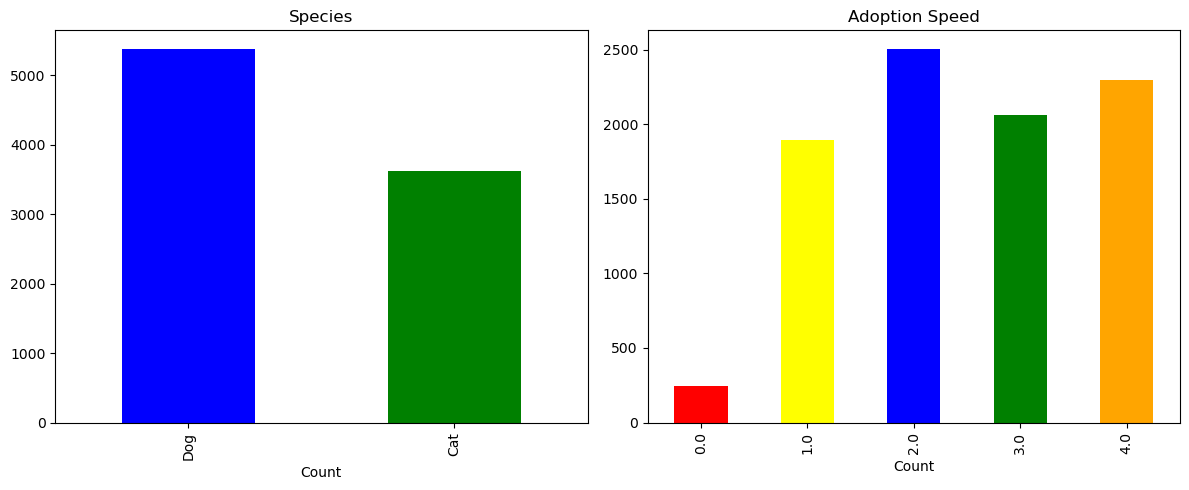

In [16]:
# display species graph
plt.subplot(1, 2, 1)
df_train_copy['Type'].value_counts().plot(kind='bar', figsize=(12,5),color=['blue','green'])

plt.title('Species')
plt.xlabel('Count')

# display adoption speed graph
plt.subplot(1, 2, 2)
df_train_copy['AdoptionSpeed'].value_counts().sort_index().plot(kind='bar',color = ["red","yellow",'blue','green','orange'])
plt.title('Adoption Speed')
plt.xlabel('Count')
print(df_train_copy['AdoptionSpeed'].value_counts())

# minimize overlap
plt.tight_layout()
plt.show()

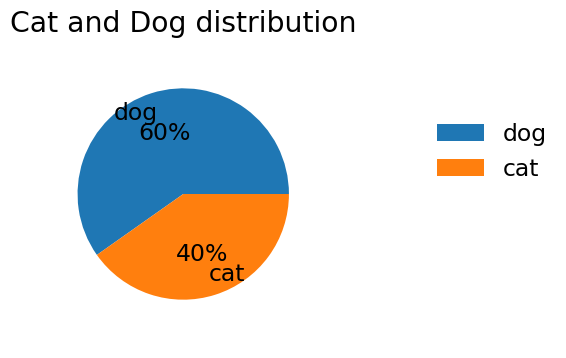

In [17]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(3,4))
plt.rcParams['font.size']=17
#percent count
labels = ["dog","cat"]
percentages = [(df_train_copy[df_train_copy["Type"]=="Dog"].AdoptionSpeed.shape[0]*100)/df_train_copy.shape[0],
               (df_train_copy[df_train_copy["Type"]=="Cat"].AdoptionSpeed.shape[0]*100)/df_train_copy.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=0.6,labeldistance=0.8)
ax.axis('equal')
ax.set_title("Cat and Dog distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

The number of dog pet is higher than the number of cat in the training dataset

#### AdoptionSpeed ( Target   **Unbalanced**)

In [18]:
# Count observations per class
class_counts = df_train_copy['AdoptionSpeed'].value_counts()

# Display results
print(class_counts)

AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64


In [19]:
#https://towardsdatascience.com/python-plotting-basics-simple-charts-with-matplotlib-seaborn-and-plotly-e36346952a3a
fig, ax = plt.subplots(figsize=(8,4))
plt.rcParams['font.size']=17
#percent count
labels = ["0","1", "2", "3", "4"]
percentages = [(df_train_copy["AdoptionSpeed"].value_counts()[0]*100)/df_train_copy.shape[0],
               (df_train_copy["AdoptionSpeed"].value_counts()[1]*100)/df_train_copy.shape[0],
              (df_train_copy["AdoptionSpeed"].value_counts()[2]*100)/df_train_copy.shape[0],
              (df_train_copy["AdoptionSpeed"].value_counts()[3]*100)/df_train_copy.shape[0],
              (df_train_copy["AdoptionSpeed"].value_counts()[4]*100)/df_train_copy.shape[0]]

ax.pie(percentages, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=0.8)
ax.axis('equal')
ax.set_title("AdoptionSpeed class distribution")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

Conclusion:

- From above distribution plot it is clear that data is **imbalanced** and there is only one class that is extreme minor i.e, 0 which counts for only 3% of all the data which is very very small. Rest of other 4 classes have very similar distribution. So we'll have have to take care of minor class.

**Our dataset is imbalanced, let's handle this problem later**

In [20]:
adoption_speed = df_train_copy['AdoptionSpeed'].value_counts()

plt.figure(figsize=(12, 5))
sns.countplot(x='AdoptionSpeed', hue='Type', data=df_train_copy,palette = "Set2")

plt.title('Distribution of Adoption Speed for Different Types')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.show()

This shows that most pet were most not likely adopted the same day they were listed and dogs are more likely to get adopted than cats

####  Pet Age feature


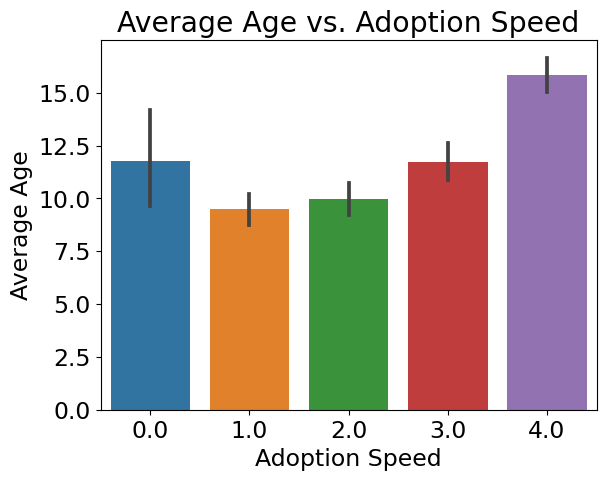

In [21]:
sns.barplot(x='AdoptionSpeed', y='Age', data=df_train_copy, estimator='mean')
plt.xlabel('Adoption Speed')
plt.ylabel('Average Age')
plt.title('Average Age vs. Adoption Speed')
plt.show()

In [22]:
print(len(df_train_copy.Age.value_counts()))
df_train_copy.Age.describe()

99


count    9000.000000
mean       11.809778
std        19.405099
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       255.000000
Name: Age, dtype: float64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axe = plt.subplots()
count_value = df_train_copy["Age"].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=count_value.values[0:10], y=count_value.index[0:10], orient="h", ax=axe)
plt.xlabel("Count")
plt.ylabel("Age")
plt.show()


- From above we can take a conclusion that around 75% of pets are between 1 to 12 months old only.
- It's a very commonsensical that age of pet is very important factor while adoption. So now we'll look at adoption speed with respect to age.

#### Pet Gender Feature

In [24]:
df_train_copy["Gender"].unique()

array(['Male', 'Female'], dtype=object)

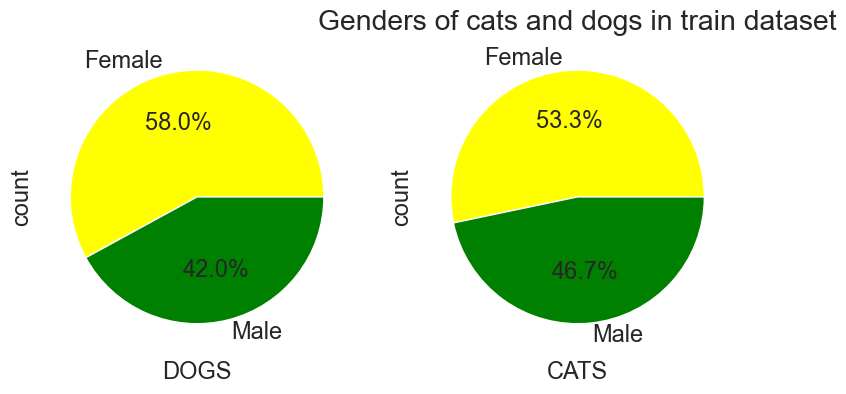

In [25]:
# # gender of pet 

import matplotlib.pyplot as plt

train_dog = df_train_copy[df_train_copy['Type'] == "Dog"]
train_cat = df_train_copy[df_train_copy['Type'] == "Cat"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7)) 

plt.title("Genders of cats and dogs in train dataset")

train_dog['Gender'].value_counts().plot(kind='pie', figsize=(9, 9), ax=ax1, colors=['yellow', 'green'], autopct='%1.1f%%')
train_cat['Gender'].value_counts().plot(kind='pie', figsize=(9, 9), ax=ax2, colors=['yellow', 'green'], autopct='%1.1f%%')

ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

plt.show()


The gender distribution in test data is not bad. Females are greater in cats and dogs however the difference is not huge.

#### Breed Feature

In [26]:
# df_train_copy['Breed'].unique()

In [27]:
df_train_copy['Breed'].value_counts().head(10)

Breed
Mixed_Breed             3776
Domestic_Short_Hair     1866
Domestic_Medium_Hair     657
Tabby                    204
Siamese                  170
Persian                  144
Domestic_Long_Hair       143
Shih_Tzu                 138
Labrador_Retriever       138
Poodle                   130
Name: count, dtype: int64

Text(0.5, 0, 'CATS')

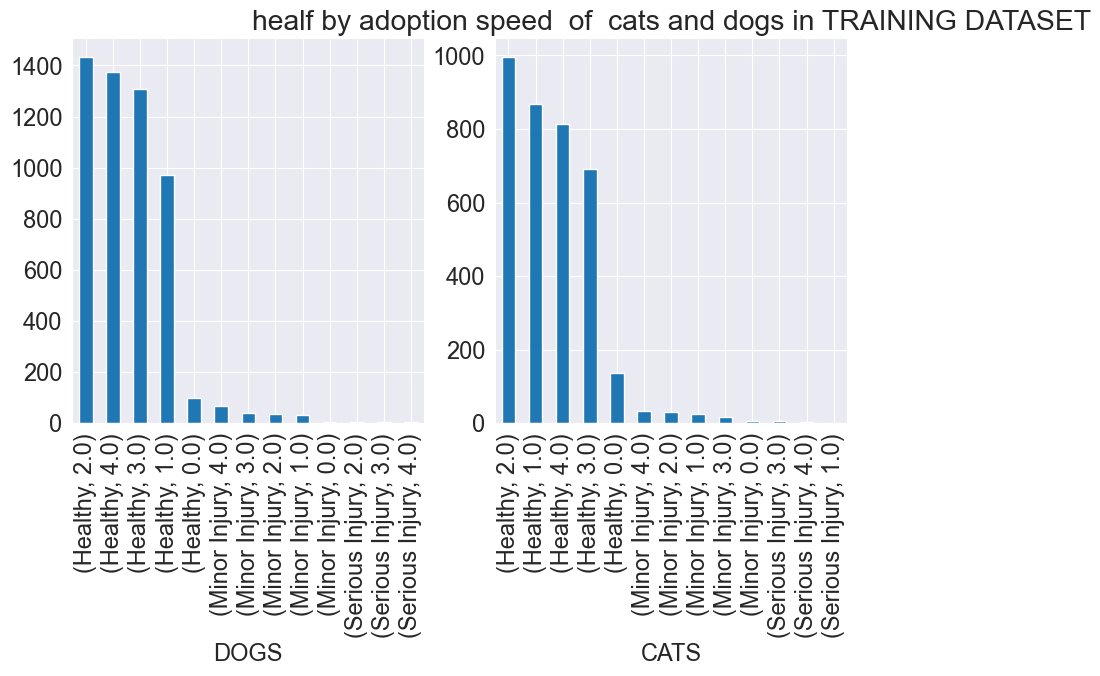

In [28]:
#train.groupby('Health')['Type'].value_counts().plot(kind='barh')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))  # 1 row, 2 columns
plt.title("healf by adoption speed  of  cats and dogs in TRAINING DATASET")
train_dog.groupby('Health')['AdoptionSpeed'].value_counts().plot(kind='bar',ax=ax1)
train_cat.groupby('Health')['AdoptionSpeed'].value_counts().plot(kind='bar',ax=ax2)
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

Heathy animals are most likely to get adopted

####  Fee Feature


In [29]:
df_train_copy.Fee.describe()


count    9000.000000
mean       24.431333
std        81.575346
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2000.000000
Name: Fee, dtype: float64

- Around 85% of total adoption posting have zero Fee.
- And there seems some outlier because max fee value is 2000 and that seems alot. We'll do some analysis on fee values.

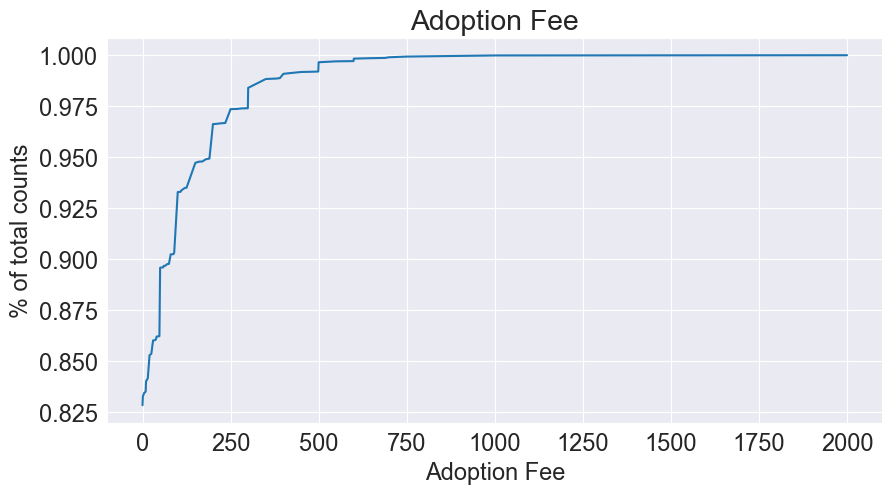

In [30]:
index = np.argsort(list(df_train_copy.Fee.value_counts().index))
#plotting
plt.figure(figsize=(10,5))
plt.plot(df_train_copy.Fee.value_counts().index[index],
        np.cumsum(df_train_copy.Fee.value_counts().values[index])/np.sum(df_train_copy.Fee.value_counts().values[index]))
plt.title("Adoption Fee")
plt.ylabel("% of total counts")
plt.xlabel("Adoption Fee")
plt.show()

- So from above it is clear that 99.99% of adoption have Fee below 1000 so we can discard rest of entries with Fee above 1000.

## Separating Numerical and Categorical columns

I am going to separate the numerical and categorical in different lists because later I would need to apply different trasformations to each type of column in the pipeline.
I am not goind to take into account the ``target, description and images`` columns because they are not numerical or categorical (technically, the target is categorical but it does not matter as we want to predict it and will not use it as part of our input data). 

I do not want ot change the original dataset so I will assign X (input data) and y (target) to different variables.

In [31]:
X = df_train_copy.drop('AdoptionSpeed', axis=1).copy()
y = np.array(df_train_copy['AdoptionSpeed']).reshape(-1,1)

In [32]:
numerical_columns_selector = selector(dtype_exclude=object) 
categorical_columns_selector = selector(pattern=r'^(?!.*(Description|Images))',dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [33]:
print("List of numerical columns: ",numerical_columns)
print("List of categorical columns: ", categorical_columns)

List of numerical columns:  ['Age', 'Fee']
List of categorical columns:  ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']


### Type is transformed converted it into cat = 0 and  dog=1  (Custom pipeline function)

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class TypeConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Type'] = X_transformed['Type'].map({'Dog': 1, 'Cat': 0})
        return X_transformed


In [35]:
# # Create the custom pipeline
# type_pipeline = Pipeline([
#     ('type_converter', TypeConverter())
# ])

# # Example usage:
# # Assuming df is your DataFrame with 'Gender' column
# transformed_df = type_pipeline.fit(X)

In [36]:
# type_pipeline.transform(X)

### Age is transformed  (Custom pipeline function)

**Dogs age at a rate of one-fifth that of humans, while cats age at a rate of one-seventh that of humans. I applied this approach to make their ages comparable to those of humans**
- https://www.quora.com/Why-are-cat-years-different-to-human-years

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class AgeConverter(BaseEstimator, TransformerMixin):
    def __init__(self, cat_scale=5, dog_scale=7):
        
        self.cat_scale = cat_scale
        self.dog_scale = dog_scale
    
    def fit(self, X, y=None):

        return self
    
    def transform(self, X):
        
        X_transformed = X.copy()
        
        # Apply the age conversion for cats
        X_transformed.loc[X_transformed['Type'] == 'Cat', 'Age'] = \
            X_transformed.loc[X_transformed['Type'] == 'Cat', 'Age'] / self.cat_scale
        
        # Apply the age conversion for dogs
        X_transformed.loc[X_transformed['Type'] == 'Dog', 'Age'] = \
            X_transformed.loc[X_transformed['Type'] == 'Dog', 'Age'] / self.dog_scale
        
        return X_transformed

### Gender = Male is converted to 0 and Female is converted to 1 (Custom pipeline function)

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

class GenderConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Gender'] = X_transformed['Gender'].map({'Male': 1, 'Female': 0})
        return X_transformed




In [39]:
# # Create the custom pipeline
# gender_pipeline = Pipeline([
#     ('gender_converter', GenderConverter())
# ])

# # Example usage:
# # Assuming df is your DataFrame with 'Gender' column
# transformed_df = gender_pipeline.transform(X)

## Ordinal Mapping   (MaturitySize)

Ordinal encoding, is a process of transforming categorical variables into numerical variables while preserving the order or hierarchy of the categories. We can apply it to columns of our dataset which are categorical at a first glance but which some kind of progression can be identified in the unique values of the column (such as a progression in size, age, etc).

To identify this, we need to study our columns' unique values.

The column ``MaturitySize`` is ordinal (there is a progression from small to extra large in its values), so we can map it as an ``ordinal column``.

### MaturitySize is converted into numerical  (Custom pipeline function)

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

class MaturitySizeConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2, 'Extra Large': 3}
        X_transformed['MaturitySize'] = X_transformed['MaturitySize'].map(size_mapping)
        return X_transformed

# Create the custom pipeline
maturity_size_pipeline = Pipeline([
    ('maturity_size_converter', MaturitySizeConverter())
])



## Text pre-processing

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
import nltk
import emoji
import string
# from spellchecker import SpellChecker
# from textblob import TextBlob
from nltk.stem import WordNetLemmatizer


In [42]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# stops = set(stopwords.words('english'))

In [43]:
# emoji handling
# !pip install emoji
import re

### clean description using TextCleaner  (Custom pipeline function)

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import pandas as pd

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Description'] = X_transformed['Description'].apply(self.clean_text1)
        return X_transformed
    
    def clean_text1(self, text):
        stop_words = set(stopwords.words('english'))
        
        # Initialize the WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        
        # Remove emojis
        emoji_pattern = re.compile("["
                                    u"\U0001F600-\U0001F64F"  # emoticons
                                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                    u"\U0001F700-\U0001F77F"  # alchemical symbols
                                    u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                    u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                    u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                    u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                    u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                    u"\U00002702-\U000027B0"  # Dingbats
                                    u"\U000024C2-\U0001F251" 
                                    u"\U0001F910-\U0001F97A"
                                    u"\U0001F980-\U0001F9B0"
                                    u"\U0001F9C0-\U0001F9FF"
                                    u"\U0001FA60-\U0001FA6F"
                                    u"\U0001FA70-\U0001FAFF"
                                    u"\U00002600-\U000026FF"  # Miscellaneous Symbols
                                    u"\U00002700-\U000027BF"  # Dingbats
                                    u"\U00002B50"
                                    u"\U000023E9-\U000023FA"  # Miscellaneous Technical
                                    "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # Tokenize the text
        text_tokens = word_tokenize(text)
        
        # Lemmatize the tokens and remove stop words
        lemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in text_tokens if word.lower() not in stop_words]
        
        # Join the lemmatized tokens back into a sentence
        cleaned_sentence = ' '.join(lemmatized_text)
        
        # Remove punctuation and extra whitespace
        cleaned_sentence = re.sub(r'[^\w\s]', '', cleaned_sentence).strip()
        
        return cleaned_sentence


##  IMAGE PRE-PROCESSING

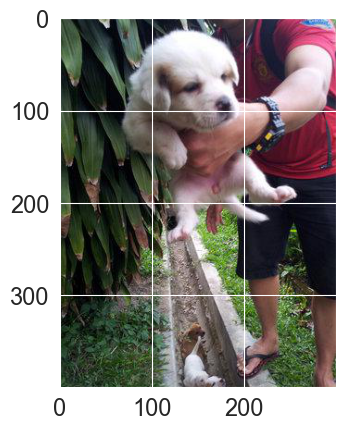

In [45]:
# Read the first image of the list
from skimage import io


img = io.imread(X['Images'][10])
# have a look to the image
plt.imshow(img)

In [46]:
# !pip install opencv-python
# !pip install opencv-contrib-python



In [47]:
# convert the image to grey levels 
import cv2

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [48]:
# compute SIFT detector and descriptors
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)

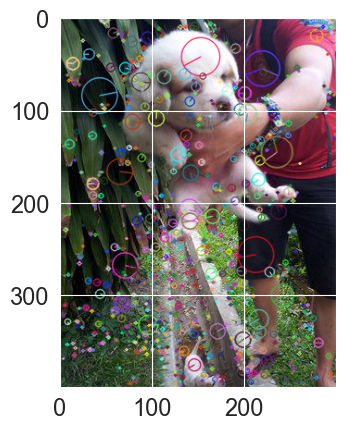

In [49]:
# plot image and descriptors
cv2.drawKeypoints(img,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

## Extract features and build BOFs

In [50]:
from sklearn.base import BaseEstimator,TransformerMixin

In [51]:
import cv2
from sklearn.cluster import MiniBatchKMeans


SIFT (Scale-Invariant Feature Transform) is a feature extraction technique used in computer vision and image processing for detecting and describing local features in images. SIFT features are useful for a wide range of applications such as object recognition, image registration, 3D reconstruction, and image retrieval.

This code performs the following steps:

- ``Extracts Scale-Invariant Feature Transform (SIFT)`` features from a list of images and returns a list of these features.

- ``Builds a clusterizer`` (a clustering algorithm) using the list of extracted SIFT features and a desired number of clusters. The clusterizer is then fitted to the SIFT features and returned.

- ``Constructs a Bag of Features (BOF)`` representation using the list of SIFT features and the fitted clusterizer. The BOF representation is a histogram of the frequency of each cluster (i.e., visual word) in the SIFT features of an image.

In [52]:
import cv2

def extract_SIFT(img_lst):
    sift = sift = cv2.SIFT_create()
    sift_lst = []
    for img in img_lst:
        img=cv2.imread(img) #Load images
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert to gray scale
        kp, des = sift.detectAndCompute(gray, None) #Extract SIFT (Scale-Invariant Feature Transform) keypoints and descriptors
        sift_lst.append(des)
    
    return sift_lst

In [53]:
from sklearn.cluster import KMeans

def clusterize(SIFs, nb_cluster):
    sift_features = np.vstack(SIFs)#Stack the SIFT features
    clusterizer = KMeans(n_clusters=nb_cluster)# Create the KMeans clusterizer
    clusterizer.fit(sift_features)# Fit the clusterizer with the SIFT features
    return clusterizer


In [54]:
def build_BOFs(SIFTs, clusterizer):
    #Initialize the BOF representation
    bof_representation = np.zeros((len(SIFTs), clusterizer.n_clusters), dtype=np.float32)
    
    #Loop through the SIFT features
    for i, sift in enumerate(SIFTs):
        cluster_labels = clusterizer.predict(sift) #Predict the cluster labels for the SIFT features
        histogram = np.bincount(cluster_labels, minlength=clusterizer.n_clusters) #Create a histogram of cluster labels
        histogram = histogram / histogram.sum() #Normalize the histogram
        bof_representation[i, :] = histogram #Store the histogram in the BOF representation
    
    return bof_representation

In [55]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class BOF_extractor(BaseEstimator,TransformerMixin): # Initialise class MyImageTransformer and nb of clusters
    def __init__(self, nb_cluster=4):
        self.nb_cluster=4

    def fit(self, X, y=None): #Use function extract_SIFT(X) and clusterize(SIFTs, self.nb_cluster) to the input data
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(SIFTs, self.nb_cluster)
        
    def transform(self, X, y=None): #transform input images and return bof representation using build_BOFs()
        self.SIFTs = extract_SIFT(X)
        return build_BOFs(self.SIFTs, self.clusterizer)
    
    def fit_transform(self, X, y=None): #transform and fit the data using all the previously defined function
        self.SIFTs = extract_SIFT(X)
        self.clusterizer = clusterize(self.SIFTs, self.nb_cluster)
        return build_BOFs(self.SIFTs, self.clusterizer)
    

## Pre-processing Pipeline  Create X and y(Target) and Split the data into train and validation set 


To achieve accurate machine learning results, it's important to use a balanced dataset. This means that the number of samples for each class in the dataset should be roughly the same. If the dataset is imbalanced, the machine learning model may be biased towards the majority class, leading to poor performance on the minority class.

To address this issue, my approach is to balance the dataset using a technique like RandomOverSampler.

- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

Performing ``cross-validation`` is a powerful method to evaluate the performance of a machine learning model. However, it can be computationally expensive, especially when the dataset is large. In this case, In my case I am facing a time constraint, and the computer takes a long time to perform cross-validation.

- https://scikit-learn.org/stable/modules/cross_validation.html

To optimize my time, I am planning to only perform cross-validation on the balanced dataset since this is the recommended approach. I will not perform cross-validation on the non-balanced dataset because I only want to compare its accuracy with the accuracy of the balanced dataset

In [56]:
#spliting the data into dependent and independent varaible

y = df_train_copy['AdoptionSpeed']
X = df_train_copy.drop(['AdoptionSpeed'], axis=1).copy()


In [57]:
# Split the data into train and validation set 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2022,stratify=y)

In [358]:
# y

In [59]:
numerical_columns

['Age', 'Fee']

In [60]:
categorical_columns


['Type',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Breed']

In [61]:
import pandas as pd

features = X.columns.tolist()
# List comprehension to separate numerical and categorical features
# For numerical features, we include those whose dtype is not 'object',
# and also specifically include 'MaturitySize', 'Gender', and 'Type' columns

numerical_features = [feature for feature in features if 
                X[feature].dtype != 'object' or feature == 'MaturitySize' or feature ==  'Gender' or feature == "Type"]

# For categorical features, we include those whose dtype is 'object' 
# but exclude certain columns like 'MaturitySize', 'Gender', 'Description', 'Images','Color3' , 'Type'.

categorical_features = [feature for feature in features if
                X[feature].dtype == object and feature != "MaturitySize" and  feature != "Gender"   and  feature != "Description"
                        and  feature != "Images"  and  feature != "Color3" and  feature != "Type" ]


print(numerical_features)
# print("\n")

print(categorical_features)

['Type', 'Age', 'Gender', 'MaturitySize', 'Fee']
['Color1', 'Color2', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']


In [62]:
text_features = ['Description']
image_features = ['Images']
drop_features = ["Color3"]

In [63]:
#  checking the number of observations per classes
y.value_counts()

AdoptionSpeed
2.0    2504
4.0    2294
3.0    2061
1.0    1894
0.0     247
Name: count, dtype: int64

In [64]:
#  checking the number of observations per classes
y_train.value_counts()

AdoptionSpeed
2.0    2003
4.0    1835
3.0    1649
1.0    1515
0.0     198
Name: count, dtype: int64

In [65]:
y_train.shape

(7200,)

### Pipeline

- https://scikit-learn.org/1.4/modules/generated/sklearn.pipeline.Pipeline.html

In [66]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample


In [67]:
# Creating pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('stdscaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
])

# Define pipeline for text features
text_transformer_pipeline = Pipeline(steps=[ ('vectorizer', CountVectorizer())])
image_transformer_pipeline = Pipeline(steps=[ ('img', BOF_extractor())])



col_transformer = ColumnTransformer(transformers=[
   ('drop_columns','drop',drop_features),

    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features),
    
    ('text-data', text_transformer_pipeline, 'Description'),
    ('image-data', image_transformer_pipeline, 'Images'),
    
    
])


    
my_sklearn_pipeline = Pipeline(steps=[
    ('TypeConverter', TypeConverter()),
    ('age', AgeConverter()),
    ('text_cleaner', TextCleaner()),
    ('MaturitySizeConverter' ,MaturitySizeConverter()),
    ("GenderConverter",GenderConverter()),

                 ('col_transformer',col_transformer),
    ]

                           )


In [68]:
my_sklearn_pipeline

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'A...Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer())]),
                                                  'Description'),
                                                 ('image-data',
                                                  Pipeline(steps=[('img',
                                                                   BOF_extractor())]),
                                                  'Images')]))])

# fit and Transfrom the data using the pipeline so that I can use that for randomsearch and model fitting

#### Pipeline is fitted using all data and stored in a variable for model training it will save time as its very hard to handel these 9000 images in my laptop

In [71]:
#  fits the sklearn pipeline `my_sklearn_pipeline` to the training data X_train.

my_sklearn_pipeline.fit(X_train)

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'A...Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer())]),
                                                  'Description'),
                                                 ('image-data',
                                                  Pipeline(steps=[('img',
                                                                   BOF_extractor())]),
                                                  'Images')]))])

In [72]:
#  transform the  the training data X_train.

X_train_transformed = my_sklearn_pipeline.transform(X_train)


In [73]:
#  transform the  the validation data X_val.

X_val_transformed = my_sklearn_pipeline.transform(X_val)


### RandomOverSampler is used to balance the data by oversampling the minority class 

**RandomOverSampler is used on X_train and y_train to balance the training data.**
 - It's important to use resampling techniques like RandomOverSampler on the training data rather than the original data to avoid data leakage. This ensures that the model is trained on balanced data while maintaining the integrity of the validation and test datasets. Data leakage can occur when information from the validation or test sets inadvertently influences the training process, leading to overly optimistic performance estimates. Resampling techniques applied solely to the training data help mitigate this risk by ensuring that the model learns from balanced representations of each class without peeking at unseen data during training.

AdoptionSpeed
2.0    2003
4.0    1835
3.0    1649
1.0    1515
0.0     800
Name: count, dtype: int64

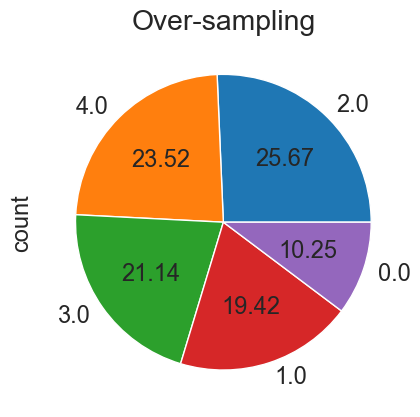

In [74]:
from imblearn.over_sampling import RandomOverSampler


# desired number of samples for the minority class
desired_minority_samples = 800  
minority_class_label = 0.0


# Create a dictionary with the desired sampling strategy
sampling_strategy = {minority_class_label : desired_minority_samples}

# RandomOverSampler with the specified sampling strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy)

X_train_transformed_resampled, y_train_resampled = ros.fit_resample(X_train_transformed, y_train)

ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
y_train_resampled.value_counts()

**I will use this resampled data set for my model training**

In [75]:
X_train_transformed_resampled


<7802x14653 sparse matrix of type '<class 'numpy.float64'>'
	with 361217 stored elements in Compressed Sparse Row format>

In [76]:
X_val_transformed

<1800x14653 sparse matrix of type '<class 'numpy.float64'>'
	with 83106 stored elements in Compressed Sparse Row format>

**X_train_transformed_resampled is converted into a dataframe**

In [87]:
import pandas as pd


dense_array_X_train_transformed_resampled = X_train_transformed_resampled.toarray()

df_X_train_transformed_resampled = pd.DataFrame(dense_array)
df_X_train_transformed_resampled.head(2)

0         1         2         3         4      5      6      7      \
0 -1.226519  0.101380  1.140316  0.207758 -0.310264    0.0    1.0    0.0   
1 -1.226519  1.220209 -0.876950  2.036438 -0.310264    0.0    1.0    0.0   

   8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.298734   
1    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.471074   

      14650     14651     14652  
0  0.124051  0.281013  0.296203  
1  0.041322  0.247934  0.239669  

[2 rows x 14653 columns]

**target class is marged with the X_train_transformed_resampled dataframe**

In [89]:
import pandas as pd

# Create a copy of the DataFrame
new_df_train = df_X_train_transformed_resampled.copy()

# Add the Series as a new column to the new DataFrame
new_df_train['AdoptionSpeed'] = y_train_resampled

new_df_train.head(2)

0         1         2         3         4    5    6    7    8    9  \
0 -1.226519  0.101380  1.140316  0.207758 -0.310264  0.0  1.0  0.0  0.0  0.0   
1 -1.226519  1.220209 -0.876950  2.036438 -0.310264  0.0  1.0  0.0  0.0  0.0   

   ...  14644  14645  14646  14647  14648     14649     14650     14651  \
0  ...    0.0    0.0    0.0    0.0    0.0  0.298734  0.124051  0.281013   
1  ...    0.0    0.0    0.0    0.0    0.0  0.471074  0.041322  0.247934   

      14652  AdoptionSpeed  
0  0.296203            4.0  
1  0.239669            2.0  

[2 rows x 14654 columns]

**X_val_transformed is converted into a dataframe**

In [90]:
import pandas as pd
dense_array_val_X_val_transformed = X_val_transformed.toarray()
df_val_X_val_transformed = pd.DataFrame(dense_array_val_X_val_transformed)
df_val_X_val_transformed.head(2)


0         1         2         3         4      5      6      7      \
0 -1.226519 -0.559747  1.140316 -1.620921 -0.310264    1.0    0.0    0.0   
1  0.815316 -0.051188 -0.876950  0.207758  2.196528    0.0    0.0    1.0   

   8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.285714   
1    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.177449   

      14650     14651     14652  
0  0.069426  0.353805  0.291055  
1  0.052372  0.411583  0.358595  

[2 rows x 14653 columns]

**target class is marged with the X_val_transformed dataframe**

In [91]:
import pandas as pd

# Create a copy of the DataFrame
new_df_validation = df_val_X_val_transformed.copy()

# Add the Series as a new column to the new DataFrame
new_df_validation['AdoptionSpeed'] = y_val

new_df_validation.head(2)

0         1         2         3         4    5    6    7    8    9  \
0 -1.226519 -0.559747  1.140316 -1.620921 -0.310264  1.0  0.0  0.0  0.0  0.0   
1  0.815316 -0.051188 -0.876950  0.207758  2.196528  0.0  0.0  1.0  0.0  0.0   

   ...  14644  14645  14646  14647  14648     14649     14650     14651  \
0  ...    0.0    0.0    0.0    0.0    0.0  0.285714  0.069426  0.353805   
1  ...    0.0    0.0    0.0    0.0    0.0  0.177449  0.052372  0.411583   

      14652  AdoptionSpeed  
0  0.291055            NaN  
1  0.358595            3.0  

[2 rows x 14654 columns]

In [ ]:
As my laptop is not capable to process this big data so I have stored the transformed X_train and 

## save the transformed data as csv so that I can use those during ml and dl training 

**X_train_transformed as df dataframe is stored in X_train_transformed_df.csv**

In [221]:
# df_X_train_transformed_resampled.to_csv('X_train_transformed_resampled.csv')


In [74]:
# df_X_train_transformed_resampled = pd.read_csv('X_train_transformed_resampled.csv') 

**X_val_transformed as df_val dataframe is stored in X_val_transformed_df.csv**

In [222]:
# df_val_X_val_transformed.to_csv('X_val_transformed.csv')


In [75]:
# df_val_X_val_transformed = pd.read_csv('X_val_transformed.csv') 

# CROSS VALIDATION AND RANDOM SEARCH CV

### Train test split the balanced dataset with only 400 data for each class from the resampled data

In [92]:

unique_classes = new_df_train['AdoptionSpeed'].unique()  # Identify unique classes
selected_df = pd.DataFrame(columns=new_df_train.columns) # empty dataframe to store selected data

# Sample 200 data points from each class
for class_label in unique_classes:
    class_data = new_df_train[new_df_train['AdoptionSpeed'] == class_label]
    if len(class_data) < 400:
        selected_df = pd.concat([selected_df, class_data])
    else:
        sampled_data = class_data.sample(n=400, replace=False, random_state=42)
        selected_df = pd.concat([selected_df, sampled_data])

# Reset index of the selected dataframe
selected_df.reset_index(drop=True, inplace=True)

selected_df.head(2)

0         1         2         3         4    5    6    7    8    9  \
0  0.815316  1.830480  1.140316 -1.620921 -0.310264  0.0  1.0  0.0  0.0  0.0   
1 -1.226519  0.609939  1.140316  0.207758 -0.310264  0.0  0.0  1.0  0.0  0.0   

   ...  14644  14645  14646  14647  14648     14649     14650     14651  \
0  ...    0.0    0.0    0.0    0.0    0.0  0.225670  0.131171  0.377997   
1  ...    0.0    0.0    0.0    0.0    0.0  0.330065  0.163399  0.196078   

      14652  AdoptionSpeed  
0  0.265162            4.0  
1  0.310458            4.0  

[2 rows x 14654 columns]

In [93]:
selected_df['AdoptionSpeed'].value_counts()

AdoptionSpeed
4.0    400
2.0    400
1.0    400
3.0    400
0.0    400
Name: count, dtype: int64

In [94]:
# Separate features (X_resampled) and target variable (y_resampled)
X_selected_400 = selected_df.drop(columns=['AdoptionSpeed'])
y_selected_400 = selected_df['AdoptionSpeed']

### The different models with the best hyper parameters, after the cross validation. 

The RandomizedSearchCV I have done only with the balanced dataset, I haven't try even with the non balanced dataset because in my computer it takes more than one day and sometimes it froze and I needed to switch off the computer and start again.

Cross-validation with RandomizedSearchCV is a technique used to optimize the hyperparameters of a machine learning model using randomized search. RandomizedSearchCV is a function from the scikit-learn library that performs hyperparameter tuning using a combination of random search and cross-validation.

The process works by defining a range of hyperparameters and their potential values. RandomizedSearchCV then randomly selects a combination of hyperparameter values from this range and trains and evaluates the model using cross-validation. The process is repeated multiple times, each time selecting a different set of hyperparameter values.

The advantage of RandomizedSearchCV is that it can be more efficient than an exhaustive grid search of all possible hyperparameter combinations. By randomly sampling the hyperparameter space, RandomizedSearchCV can often find good hyperparameter values with fewer evaluations.

The output of RandomizedSearchCV is the best set of hyperparameters that was found during the search, along with the corresponding cross-validation score. These hyperparameters can then be used to train the final model on the entire dataset.

##### Models where I will train with balance dataset  (RandomizedSearchCV )

In [232]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# hyperparameters
param_distributions = {
    'RandomForestClassifier': {
        # Random Forest hyperparameters
        'randomforestclassifier__n_estimators': [20, 50, 150],  # Number of trees in the forest
        'randomforestclassifier__max_depth': [15, 50, 100],     # Maximum depth of the tree
        'randomforestclassifier__bootstrap': [True, False],     # Whether bootstrap samples are used when building trees
        'randomforestclassifier__min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
    },
    'GradientBoostingClassifier': {
        # Gradient Boosting hyperparameters
        'gradientboostingclassifier__n_estimators': [80, 100, 120],   # Number of boosting stages to be run
        'gradientboostingclassifier__learning_rate': [0.1, 0.2, 0.3],  # Learning rate shrinks the contribution of each tree
    },
    'KNN_CLF': {
        # KNN hyperparameters
        'kneighborsclassifier__n_neighbors': [4, 5, 6],          # Number of neighbors to use
        'kneighborsclassifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
    },
    'LogisticRegression': {
        # Logistic Regression hyperparameters
        'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],  # Regularization penalty
        'logisticregression__C': [0.2, 0.5, 1.0, 2.0,3.0,4.0],       # Inverse of regularization strength
        'logisticregression__verbose': [1, 2, 3],                    # Verbosity mode
        'logisticregression__max_iter': [5000],                     # Maximum number of iterations
        'logisticregression__solver': ['liblinear', 'saga']         # Algorithm to use in the optimization problem
    }
}



# Initialize classifiers
# classifiers = {
#     'GradientBoostingClassifier': make_pipeline(my_sklearn_pipeline, GradientBoostingClassifier()),
#     'KNN_CLF': make_pipeline(my_sklearn_pipeline, KNeighborsClassifier()),
#     'LogisticRegression': make_pipeline(my_sklearn_pipeline, LogisticRegression()),
#     'RandomForestClassifier': make_pipeline(my_sklearn_pipeline, RandomForestClassifier())
# }


classifiers = {
    'GradientBoostingClassifier': make_pipeline( GradientBoostingClassifier()),
    'KNN_CLF': make_pipeline( KNeighborsClassifier()),
    'LogisticRegression': make_pipeline( LogisticRegression()),
    'RandomForestClassifier': make_pipeline( RandomForestClassifier())
}

In [233]:
classifiers

{'GradientBoostingClassifier': Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())]),
 'KNN_CLF': Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())]),
 'LogisticRegression': Pipeline(steps=[('logisticregression', LogisticRegression())]),
 'RandomForestClassifier': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}

In [235]:
# from sklearn.model_selection import RandomizedSearchCV

# random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs=-1)


In [237]:
# Perform random search for each algorithm
best_params = {}
for algo, clf in classifiers.items():
    search = RandomizedSearchCV(clf, param_distributions[algo], n_iter=10, cv=3, random_state=42)
    search.fit(X_selected_400, y_selected_400)
    best_params[algo] = search.best_params_

# Print best parameters for each algorithm
for algo, params in best_params.items():
    print(f"Best parameters for {algo}: {params}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3448 epochs took 2584 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 43.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4136 epochs took 2975 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 49.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 49.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3491 epochs took 2550 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 42.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 42.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 467 epochs took 246 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 445 epochs took 231 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 556 epochs took 293 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1290 epochs took 839 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 376 epochs took 245 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 801 epochs took 592 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1945 epochs took 1221 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 20.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1236 epochs took 778 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1969 epochs took 1266 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.1min finished


[LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1179 epochs took 781 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 659 epochs took 437 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1126 epochs took 747 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 12.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3466 epochs took 2802 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 46.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 46.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4379 epochs took 3672 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 61.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 61.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3770 epochs took 3503 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 58.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 58.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 468 epochs took 313 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 444 epochs took 295 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 555 epochs took 367 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.1min finished


[LibLinear]Best parameters for GradientBoostingClassifier: {'gradientboostingclassifier__n_estimators': 120, 'gradientboostingclassifier__learning_rate': 0.3}
Best parameters for KNN_CLF: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 6}
Best parameters for LogisticRegression: {'logisticregression__verbose': 3, 'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 5000, 'logisticregression__C': 2.0}
Best parameters for RandomForestClassifier: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__bootstrap': True}


**Best Parameters**


- Best parameters for GradientBoostingClassifier: {'gradientboostingclassifier__n_estimators': 120, 'gradientboostingclassifier__learning_rate': 0.3}

:

- Best parameters for KNN_CLF: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 6}

:

- Best parameters for LogisticRegression: {'logisticregression__verbose': 3, 'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 5000, 'logisticregression__C': 2.0}

:

- Best parameters for RandomForestClassifier: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 100, 'randomforestclassifier__bootstrap': True}

### Model Training using the whole Resampled train data

In [116]:
df_X_train_transformed_resampled

0         1         2         3         4      5      6      7      \
0    -1.226519  0.101380  1.140316  0.207758 -0.310264    0.0    1.0    0.0   
1    -1.226519  1.220209 -0.876950  2.036438 -0.310264    0.0    1.0    0.0   
2     0.815316 -0.559747 -0.876950  0.207758 -0.310264    0.0    1.0    0.0   
3     0.815316 -0.559747 -0.876950  0.207758  1.569830    0.0    1.0    0.0   
4    -1.226519 -0.102044  1.140316  2.036438 -0.310264    1.0    0.0    0.0   
...        ...       ...       ...       ...       ...    ...    ...    ...   
7797 -1.226519 -0.152900 -0.876950  0.207758 -0.310264    1.0    0.0    0.0   
7798  0.815316  3.559580  1.140316  2.036438  3.449925    1.0    0.0    0.0   
7799 -1.226519 -0.508891  1.140316 -1.620921 -0.310264    0.0    0.0    0.0   
7800 -1.226519 -0.458035 -0.876950  0.207758 -0.310264    1.0    0.0    0.0   
7801 -1.226519 -0.508891  1.140316 -1.620921 -0.310264    0.0    0.0    0.0   

      8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.298734   
1       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.471074   
2       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.351990   
3       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.438144   
4       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.478992   
...     ...    ...  ...    ...    ...    ...    ...    ...    ...       ...   
7797    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.079652   
7798    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.365782   
7799    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.323767   
7800    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.393939   
7801    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.323767   

         14650     14651     14652  
0     0.124051  0.281013  0.296203  
1     0.041322  0.247934  0.239669  
2     0.078358  0.268657  0.300995  
3     0.051546  0.280928  0.229381  
4     0.033613  0.142857  0.344538  
...        ...       ...       ...  
7797  0.080377  0.495293  0.344678  
7798  0.103245  0.300885  0.230089  
7799  0.060987  0.309417  0.305830  
7800  0.145455  0.230303  0.230303  
7801  0.060987  0.309417  0.305830  

[7802 rows x 14653 columns]

In [117]:
df_val_X_val_transformed

0         1         2         3         4      5      6      7      \
0    -1.226519 -0.559747  1.140316 -1.620921 -0.310264    1.0    0.0    0.0   
1     0.815316 -0.051188 -0.876950  0.207758  2.196528    0.0    0.0    1.0   
2     0.815316 -0.458035 -0.876950  0.207758 -0.310264    1.0    0.0    0.0   
3     0.815316 -0.508891 -0.876950  0.207758 -0.310264    0.0    1.0    0.0   
4    -1.226519 -0.508891 -0.876950 -1.620921 -0.184925    0.0    0.0    0.0   
...        ...       ...       ...       ...       ...    ...    ...    ...   
1795  0.815316 -0.458035  1.140316  0.207758  2.823227    1.0    0.0    0.0   
1796  0.815316 -0.203756  1.140316 -1.620921  2.196528    1.0    0.0    0.0   
1797  0.815316 -0.508891 -0.876950  0.207758 -0.310264    1.0    0.0    0.0   
1798 -1.226519 -0.458035  1.140316  0.207758 -0.310264    0.0    0.0    0.0   
1799 -1.226519 -0.508891  1.140316 -1.620921 -0.310264    0.0    1.0    0.0   

      8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.285714   
1       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.177449   
2       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.457912   
3       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.141079   
4       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.551227   
...     ...    ...  ...    ...    ...    ...    ...    ...    ...       ...   
1795    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.246454   
1796    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.203554   
1797    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.479310   
1798    1.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.286344   
1799    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.286822   

         14650     14651     14652  
0     0.069426  0.353805  0.291055  
1     0.052372  0.411583  0.358595  
2     0.097643  0.249158  0.195286  
3     0.099585  0.435685  0.323651  
4     0.038961  0.284271  0.125541  
...        ...       ...       ...  
1795  0.129433  0.352837  0.271277  
1796  0.061389  0.518578  0.216478  
1797  0.068966  0.272414  0.179310  
1798  0.193833  0.330396  0.189427  
1799  0.077519  0.275194  0.360465  

[1800 rows x 14653 columns]

# Machine Learning Models 

##### Model training using LogisticRegression with best_params 
- {'logisticregression__verbose': 3, 'logisticregression__solver': 'liblinear', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 5000, 'logisticregression__C': 2.0}


In [109]:
# classifier_lr = LogisticRegression(verbose= 1,penalty = 'l2',max_iter= 1000, C =  3.0)
classifier_lr = LogisticRegression(verbose= 3,solver = 'liblinear', penalty = 'l2',max_iter= 5000, C =  2.0)



In [110]:
pipeline_final_lr = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('LogisticRegression_classifier',classifier_lr)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [111]:
pipeline_final_lr

Pipeline(memory='tmp/cache',
         steps=[('LogisticRegression_classifier',
                 LogisticRegression(C=2.0, max_iter=5000, solver='liblinear',
                                    verbose=3))])

In [112]:
pipeline_final_lr.fit(df_X_train_transformed_resampled,y_train_resampled)

[LibLinear]

Pipeline(memory='tmp/cache',
         steps=[('LogisticRegression_classifier',
                 LogisticRegression(C=2.0, max_iter=5000, solver='liblinear',
                                    verbose=3))])

In [113]:

y_pred_lr=pipeline_final_lr.predict(df_val_X_val_transformed)


In [114]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_lr, average= 'weighted') 

0.37048772873553426

In [115]:
from sklearn.metrics import cohen_kappa_score

kp_lr=cohen_kappa_score(y_val,y_pred_lr)
kp_lr

0.17754110260107603

##### Model training using RandomForestClassifier with best_params 


In [120]:
classifier_rf = RandomForestClassifier(n_estimators= 50, max_depth= 50, bootstrap= True)

# model_rf = make_pipeline(my_sklearn_pipeline, classifier_rf)

In [121]:
pipeline_final_rf = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('RandomForest_Classifier',classifier_rf)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [122]:
pipeline_final_rf.fit(df_X_train_transformed_resampled,y_train_resampled)

Pipeline(memory='tmp/cache',
         steps=[('RandomForest_Classifier',
                 RandomForestClassifier(max_depth=50, n_estimators=50))])

In [123]:
y_pred_rf=pipeline_final_rf.predict(df_val_X_val_transformed)


In [124]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_rf, average= 'weighted') 

0.4094699812714273

In [125]:
from sklearn.metrics import cohen_kappa_score

kp_rf=cohen_kappa_score(y_val,y_pred_rf)
kp_rf

0.19771296367318925

##### Model training using GradientBoostingClassifier with best_params 


In [133]:
classifier_gb = GradientBoostingClassifier(n_estimators= 120, learning_rate = 0.2)

# model_gb = make_pipeline(my_sklearn_pipeline, classifier_gb)


In [134]:
pipeline_final_gb = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('GradientBoosting_Classifier',classifier_gb)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [135]:
pipeline_final_gb

Pipeline(memory='tmp/cache',
         steps=[('GradientBoosting_Classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=120))])

In [136]:
pipeline_final_gb.fit(df_X_train_transformed_resampled,y_train_resampled)

Pipeline(memory='tmp/cache',
         steps=[('GradientBoosting_Classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=120))])

In [137]:
y_pred_gb=pipeline_final_gb.predict(df_val_X_val_transformed)


In [138]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_gb, average= 'weighted') 

0.3814493836551052

In [139]:
from sklearn.metrics import cohen_kappa_score

kp_gb=cohen_kappa_score(y_val,y_pred_gb)
kp_gb

0.18104967629188817

##### Model training using KNeighborsClassifier with best_params 


In [126]:
classifier_knn = KNeighborsClassifier(n_neighbors= 4)

In [127]:

pipeline_final_knn = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    ('KNeighbors_Classifier',classifier_knn)
    
                          ],
                             memory = 'tmp/cache'
                            )


In [128]:
pipeline_final_knn

Pipeline(memory='tmp/cache',
         steps=[('KNeighbors_Classifier', KNeighborsClassifier(n_neighbors=4))])

In [129]:
pipeline_final_knn.fit(df_X_train_transformed_resampled,y_train_resampled)

Pipeline(memory='tmp/cache',
         steps=[('KNeighbors_Classifier', KNeighborsClassifier(n_neighbors=4))])

In [130]:
y_pred_knn=pipeline_final_knn.predict(df_val_X_val_transformed)


In [131]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_knn, average= 'weighted') 

0.3370042872206625

In [132]:
from sklearn.metrics import cohen_kappa_score

kp_knn=cohen_kappa_score(y_val,y_pred_knn)
kp_knn

0.12328131474431225

## On TEST DATA

In [142]:
df_test_copy.head(1)

Type  Age Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0   Male  Black  White  Unknown        Small       Yes         No   

  Dewormed Sterilized   Health  Fee  \
0       No         No  Healthy  0.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   

                                              Images                Breed  
0  C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...  Domestic_Short_Hair

In [143]:
df_test_copy["Images"][0]

'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\5df99d229-2.jpg'

In [144]:
df_test_copy_transformed = my_sklearn_pipeline.transform(df_test_copy)

In [145]:
import pandas as pd
dense_array_test = df_test_copy_transformed.toarray()


df_test_copy_transformed_dataframe = pd.DataFrame(dense_array_test)


In [146]:
df_test_copy_transformed_dataframe.head()

0         1         2         3         4      5      6      7      \
0 -1.226519 -0.559747  1.140316 -1.620921 -0.310264    1.0    0.0    0.0   
1  0.815316 -0.203756  1.140316  0.207758 -0.310264    1.0    0.0    0.0   
2  0.815316 -0.508891 -0.876950  0.207758 -0.310264    0.0    1.0    0.0   
3  0.815316 -0.458035 -0.876950  0.207758 -0.310264    1.0    0.0    0.0   
4 -1.226519 -0.458035 -0.876950  0.207758 -0.184925    0.0    1.0    0.0   

   8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.261236   
1    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.337393   
2    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.503165   
3    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.314961   
4    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.440789   

      14650     14651     14652  
0  0.070225  0.370787  0.297753  
1  0.076736  0.331303  0.254568  
2  0.060127  0.164557  0.272152  
3  0.031496  0.244094  0.409449  
4  0.019737  0.210526  0.328947  

[5 rows x 14653 columns]

### save the transformed training data as csv so that I can use those during ml and dl training


### df_test_copy_transformed as df_test_copy_transformed_dataframe dataframe is stored in df_test_copy_transformed_dataframe_df.csv

In [111]:
# df_test_copy_transformed_dataframe.to_csv('df_test_copy_transformed_dataframe_df.csv')


In [127]:
# df_test_copy_transformed_dataframe = pd.read_csv('df_test_copy_transformed_dataframe_df.csv')


## **Asthe highest kappa score I found by using RandomForestClassifier so finally I will use it  for the test data prediction**



In [147]:
y_pred_random_true = pipeline_final_rf.predict(df_test_copy_transformed_dataframe)


In [148]:
y_pred_logistic_true = pipeline_final_lr.predict(df_test_copy_transformed_dataframe)
y_pred_knn_true = pipeline_final_knn.predict(df_test_copy_transformed_dataframe)
y_pred_gbc_true = pipeline_final_gb.predict(df_test_copy_transformed_dataframe)

In [322]:
models_pred = {}
models_pred['logistic'] = y_pred_logistic_true
models_pred['random'] = y_pred_random_true
models_pred['knn'] = y_pred_knn_true
# models_pred['gbc'] = y_pred_gbc_true


In [324]:
df_final_result_test_all = pd.DataFrame(models_pred)
print(df_final_result_test_all)

     logistic  random  knn
0         3.0     2.0  1.0
1         2.0     2.0  3.0
2         3.0     2.0  3.0
3         4.0     4.0  4.0
4         3.0     2.0  2.0
..        ...     ...  ...
495       4.0     2.0  4.0
496       1.0     1.0  1.0
497       4.0     4.0  4.0
498       4.0     4.0  4.0
499       4.0     2.0  0.0

[500 rows x 3 columns]


In [325]:
df_final_result_test_all.to_csv('df_final_result_test_all.csv')

## I got heighest kappa score using RandomForestClassifier, So i am finally predicting the result using RandomForestClassifier  and storigthe data in csv file format

At the end of the project, you must submit:

an executer notebook writed like a report in order to explain your choice and your strategy
your prediction for the test part (2 columns csv with id and prediction rate)
the evaluation metric is the quadratic kappa score (available in sklearn)

In [286]:
df_y_pred_random_true = pd.DataFrame(y_pred_random_true,columns=['prediction rate'])
print(df_y_pred_random_true)

     prediction rate
0                2.0
1                2.0
2                2.0
3                4.0
4                2.0
..               ...
495              2.0
496              1.0
497              4.0
498              4.0
499              2.0

[500 rows x 1 columns]


In [303]:
# df_y_pred_random_true.to_csv(' result_ml.csv')
df_y_pred_random_true.to_csv(' result_ml.csv',index_label = 'id')

In [ ]:
# df_final_result_test_all['logistic'].to_csv(' result.csv', index=False)

# Deep Learning Model

In [176]:
import pandas as pd


dense_array_X_train_transformed_resampled = X_train_transformed_resampled.toarray()

df_X_train_transformed_resampled = pd.DataFrame(dense_array)
df_X_train_transformed_resampled.head(2)

0         1         2         3         4      5      6      7      \
0 -1.226519  0.101380  1.140316  0.207758 -0.310264    0.0    1.0    0.0   
1 -1.226519  1.220209 -0.876950  2.036438 -0.310264    0.0    1.0    0.0   

   8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.298734   
1    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.471074   

      14650     14651     14652  
0  0.124051  0.281013  0.296203  
1  0.041322  0.247934  0.239669  

[2 rows x 14653 columns]

In [177]:
import pandas as pd
dense_array_val_X_val_transformed = X_val_transformed.toarray()
df_val_X_val_transformed = pd.DataFrame(dense_array_val_X_val_transformed)
df_val_X_val_transformed.head(2)


0         1         2         3         4      5      6      7      \
0 -1.226519 -0.559747  1.140316 -1.620921 -0.310264    1.0    0.0    0.0   
1  0.815316 -0.051188 -0.876950  0.207758  2.196528    0.0    0.0    1.0   

   8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.285714   
1    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.177449   

      14650     14651     14652  
0  0.069426  0.353805  0.291055  
1  0.052372  0.411583  0.358595  

[2 rows x 14653 columns]

In [178]:
dense_array_X_train_transformed_resampled.shape

(7802, 14653)

In [179]:
dense_array_val_X_val_transformed.shape

(1800, 14653)

##  Model -1 (MLP)

In [180]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense


In [181]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model_dl2 = Sequential([
    Input(shape=(dense_array_X_train_transformed_resampled.shape[1],)),
    Dense(1024, activation='relu'),
    Dropout(0.3),
        Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])


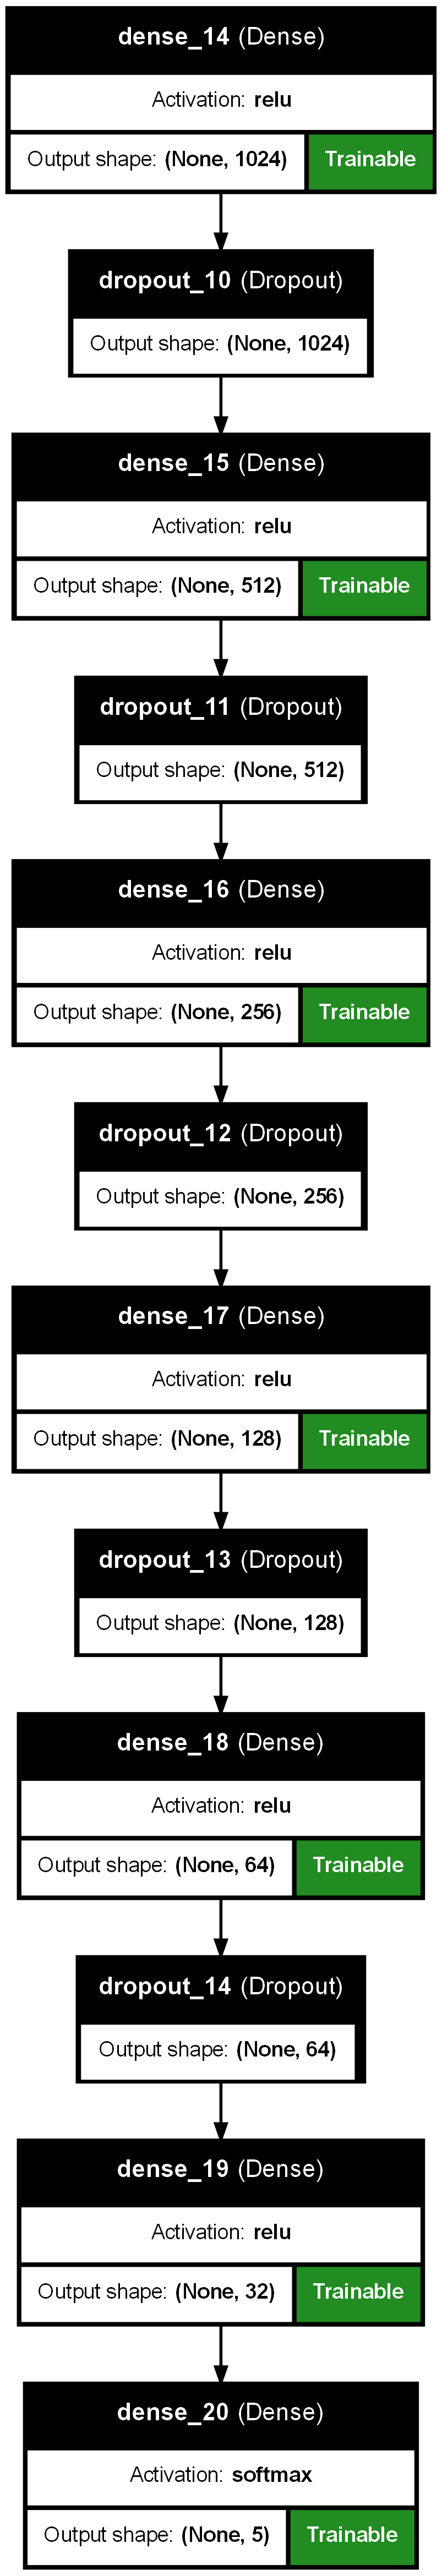

In [200]:
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
plot_model(model_dl2, to_file='model_plot2.png',
 show_shapes=True,
 show_layer_names=True,
 layer_range=None,
 show_layer_activations=True,
 show_trainable=True)


In [182]:
model_dl2.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 1024)                │      15,005,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,705,221 (59.91 MB)

 Trainable params: 15,705,221 (59.91 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
model_dl2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [184]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history_model_dl2 = model_dl2.fit(dense_array_X_train_transformed_resampled, y_train_resampled, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 148ms/step - accuracy: 0.2741 - loss: 1.5078 - val_accuracy: 0.2044 - val_loss: 2.0752
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 155ms/step - accuracy: 0.4151 - loss: 1.3329 - val_accuracy: 0.2261 - val_loss: 1.9477
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.5316 - loss: 1.1113 - val_accuracy: 0.2389 - val_loss: 1.8150
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.6922 - loss: 0.7795 - val_accuracy: 0.4305 - val_loss: 1.6681
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.7898 - loss: 0.5614 - val_accuracy: 0.5208 - val_loss: 1.6075
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8702 - loss: 0.3818 - val_accuracy: 0.5349 - val_loss: 1.8078
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.9043 - loss: 0.3143 - val_accuracy: 0.5279 - val_loss: 1.9766
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step - accuracy: 0.9204 - loss: 0

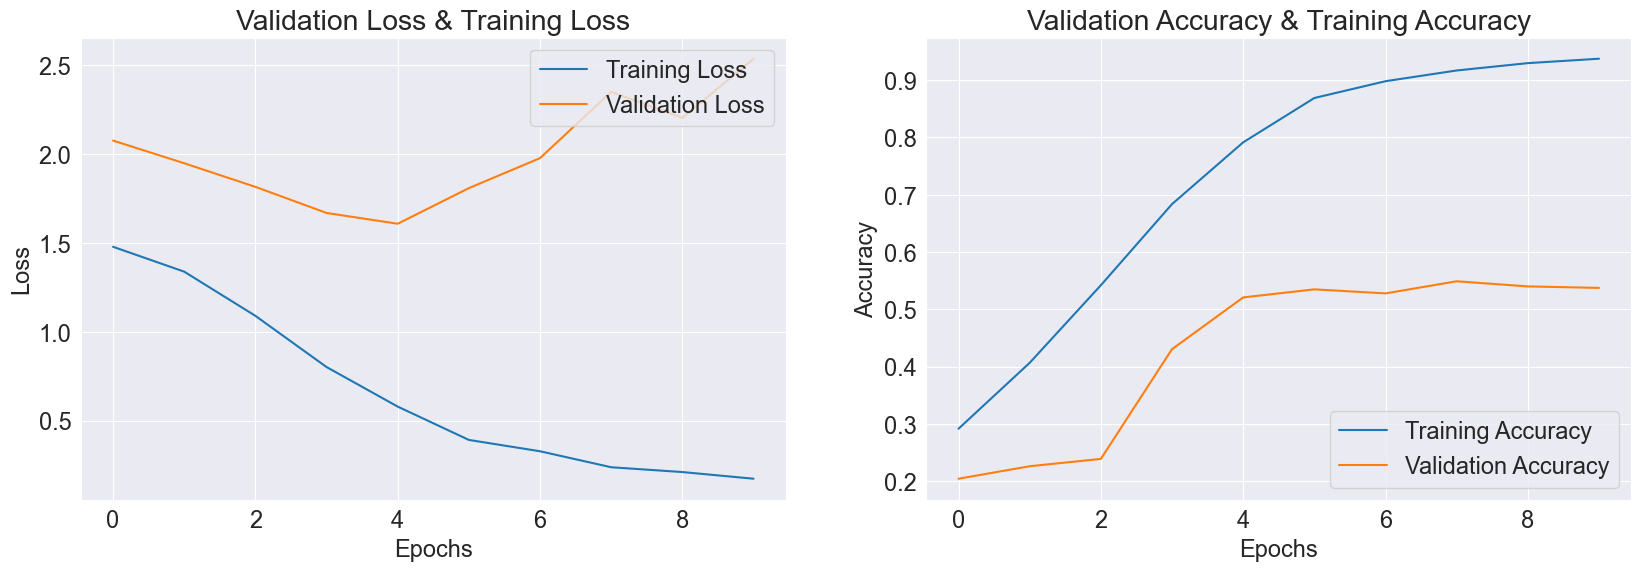

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Plot the first subplot (loss)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(history_model_dl2.history["loss"])
plt.plot(history_model_dl2.history["val_loss"])
plt.title("Validation Loss & Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
leg = plt.legend(["Training Loss", "Validation Loss"], loc="upper right")

# Plot the second subplot (accuracy)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(history_model_dl2.history["accuracy"])
plt.plot(history_model_dl2.history["val_accuracy"])
plt.title("Validation Accuracy & Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
leg = plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

plt.show()


**So ths deep learning model is overfitted**

In [189]:
y_pred_val_model_dl2 = model_dl2.predict(dense_array_val_X_val_transformed)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [190]:
predicted_class_model_dl2 = np.argmax(y_pred_val_model_dl2, axis=1)
predicted_class_model_dl2

array([1, 3, 2, ..., 2, 3, 1], dtype=int64)

In [191]:
from sklearn.metrics import cohen_kappa_score

kp_model_dl2=cohen_kappa_score(y_val,predicted_class_model_dl2)
kp_model_dl2

0.16717386770164133

## Model-2 (MLP)

In [271]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model_dl3 = Sequential([
    Input(shape=(dense_array_X_train_transformed_resampled.shape[1],)),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dense(5, activation='softmax')
])


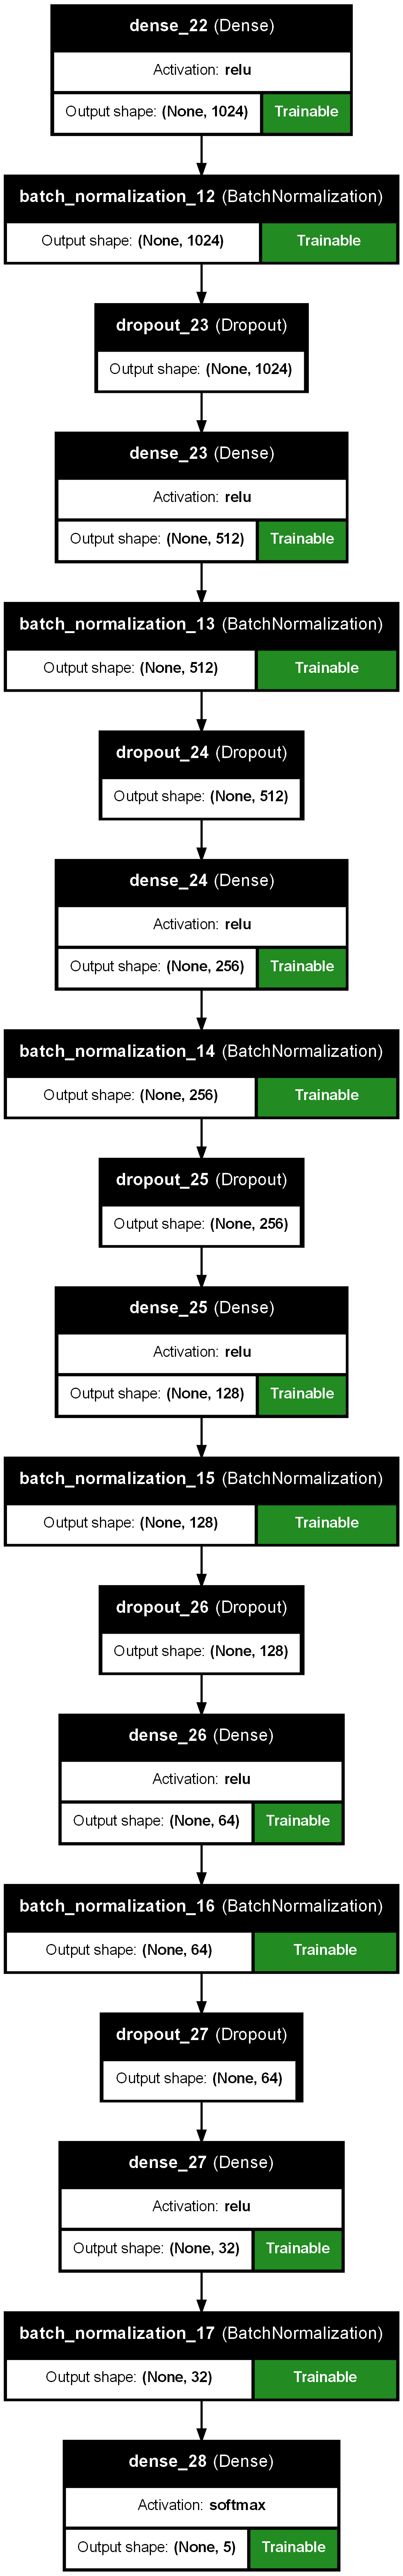

In [272]:
# from tensorflow.keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
plot_model(model_dl3, to_file='model_plot3.png',
 show_shapes=True,
 show_layer_names=True,
 layer_range=None,
 show_layer_activations=True,
 show_trainable=True)


In [273]:
model_dl3.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 1024)                │      15,005,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,713,285 (59.94 MB)

 Trainable params: 15,709,253 (59.93 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [274]:
model_dl3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [275]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_model_dl3 = model_dl3.fit(dense_array_X_train_transformed_resampled, y_train_resampled, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 204ms/step - accuracy: 0.2359 - loss: 7.2854 - val_accuracy: 0.1749 - val_loss: 7.3374
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 191ms/step - accuracy: 0.3260 - loss: 6.8489 - val_accuracy: 0.2159 - val_loss: 6.6761
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 38s 192ms/step - accuracy: 0.3846 - loss: 5.8009 - val_accuracy: 0.2242 - val_loss: 5.7876
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - accuracy: 0.4397 - loss: 4.7753 - val_accuracy: 0.2249 - val_loss: 5.0507
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.4891 - loss: 4.0082 - val_accuracy: 0.2268 - val_loss: 4.6268
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.5415 - loss: 3.4224 - val_accuracy: 0.2338 - val_loss: 4.1884
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 213ms/step - accuracy: 0.5832 - loss: 3.0524 - val_accuracy: 0.2569 - val_loss: 3.8318
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - accuracy: 0.6217 - loss: 2

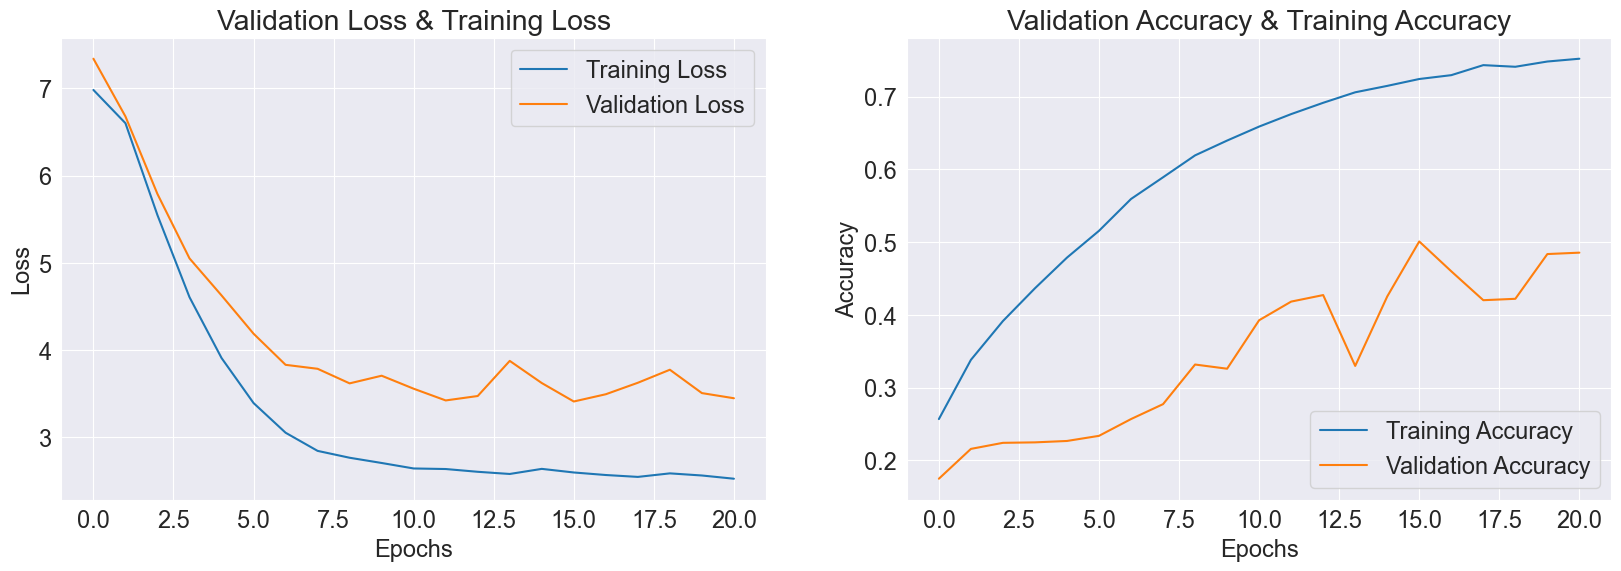

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Plot the first subplot (loss)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(history_model_dl3.history["loss"])
plt.plot(history_model_dl3.history["val_loss"])
plt.title("Validation Loss & Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
leg = plt.legend(["Training Loss", "Validation Loss"], loc="upper right")

# Plot the second subplot (accuracy)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(history_model_dl3.history["accuracy"])
plt.plot(history_model_dl3.history["val_accuracy"])
plt.title("Validation Accuracy & Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
leg = plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

plt.show()


In [277]:
y_pred_val_model_dl3 = model_dl3.predict(dense_array_val_X_val_transformed)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [278]:
predicted_class_model_dl3 = np.argmax(y_pred_val_model_dl3, axis=1)
predicted_class_model_dl3

array([1, 4, 2, ..., 3, 2, 0], dtype=int64)

In [279]:
from sklearn.metrics import cohen_kappa_score

kp_model_dl3=cohen_kappa_score(y_val,predicted_class_model_dl3)
kp_model_dl3

0.20020809195432487

## MODEL-3 (Budirectional LSTM)

In [241]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dense_array_X_train_transformed_resampled_reshaped = dense_array_X_train_transformed_resampled.reshape(dense_array_X_train_transformed_resampled.shape[0], 1, dense_array_X_train_transformed_resampled.shape[1])


# Build the Bidirectional LSTM model
model_lstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(dense_array_X_train_transformed_resampled_reshaped.shape[1], dense_array_val_X_val_transformed_reshaped.shape[2])),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])



In [242]:
# from tensorflow.keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
plot_model(model_lstm, to_file='model_plot_lstm.png',
 show_shapes=True,
 show_layer_names=True,
 layer_range=None,
 show_layer_activations=True,
 show_trainable=True)


In [243]:
model_lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional)      │ (None, 1, 128)              │       7,535,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,581,317 (28.92 MB)

 Trainable params: 7,581,317 (28.92 MB)

 Non-trainable params: 0 (0.00 B)

In [244]:
# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

#

In [245]:
# dense_array_val_X_val_transformed_reshaped.shape

In [246]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
# history_model_dl3 = model_dl3.fit(df, y_train_resampled, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])
history_model_lstm = model_lstm.fit(dense_array_X_train_transformed_resampled_reshaped, y_train_resampled, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - accuracy: 0.2715 - loss: 1.5333 - val_accuracy: 0.2012 - val_loss: 2.0395
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.3717 - loss: 1.3764 - val_accuracy: 0.2422 - val_loss: 1.8430
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.5013 - loss: 1.1929 - val_accuracy: 0.2639 - val_loss: 1.7744
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.6173 - loss: 0.9766 - val_accuracy: 0.3530 - val_loss: 1.7644
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.7000 - loss: 0.7893 - val_accuracy: 0.4158 - val_loss: 1.8243
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.7588 - loss: 0.6479 - val_accuracy: 0.4869 - val_loss: 1.8464
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.8180 - loss: 0.5200 - val_accuracy: 0.4990 - val_loss: 2.0458
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.8430 - loss: 0.4533 - 

In [251]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Plot the first subplot (loss)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(history_model_lstm.history["loss"])
plt.plot(history_model_lstm.history["val_loss"])
plt.title("Validation Loss & Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
leg = plt.legend(["Training Loss", "Validation Loss"], loc="upper right")

# Plot the second subplot (accuracy)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(history_model_lstm.history["accuracy"])
plt.plot(history_model_lstm.history["val_accuracy"])
plt.title("Validation Accuracy & Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
leg = plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

plt.show()


**So ths deep learning model is overfitted**

In [247]:
dense_array_val_X_val_transformed_reshaped = dense_array_val_X_val_transformed.reshape(dense_array_val_X_val_transformed.shape[0], 1, dense_array_val_X_val_transformed.shape[1])



In [248]:
y_pred_val_model_lstm = model_lstm.predict(dense_array_val_X_val_transformed_reshaped)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [249]:
predicted_class_model_lstm = np.argmax(y_pred_val_model_lstm, axis=1)
predicted_class_model_lstm

array([1, 2, 2, ..., 3, 2, 1], dtype=int64)

**KAPPA SCORE**

In [250]:
from sklearn.metrics import cohen_kappa_score

kp_model_lstm=cohen_kappa_score(y_val,predicted_class_model_lstm)
kp_model_lstm

0.1836346383642512

## MODEL-4 (LSTM)

In [252]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# dense_array_X_train_transformed_resampled_reshaped = dense_array_X_train_transformed_resampled.reshape(dense_array_X_train_transformed_resampled.shape[0], 1, dense_array_X_train_transformed_resampled.shape[1])


# Build the LSTM model
model_lstm_normal = Sequential([
    LSTM(64, return_sequences=True, input_shape=(dense_array_X_train_transformed_resampled_reshaped.shape[1], dense_array_X_train_transformed_resampled_reshaped.shape[2])),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


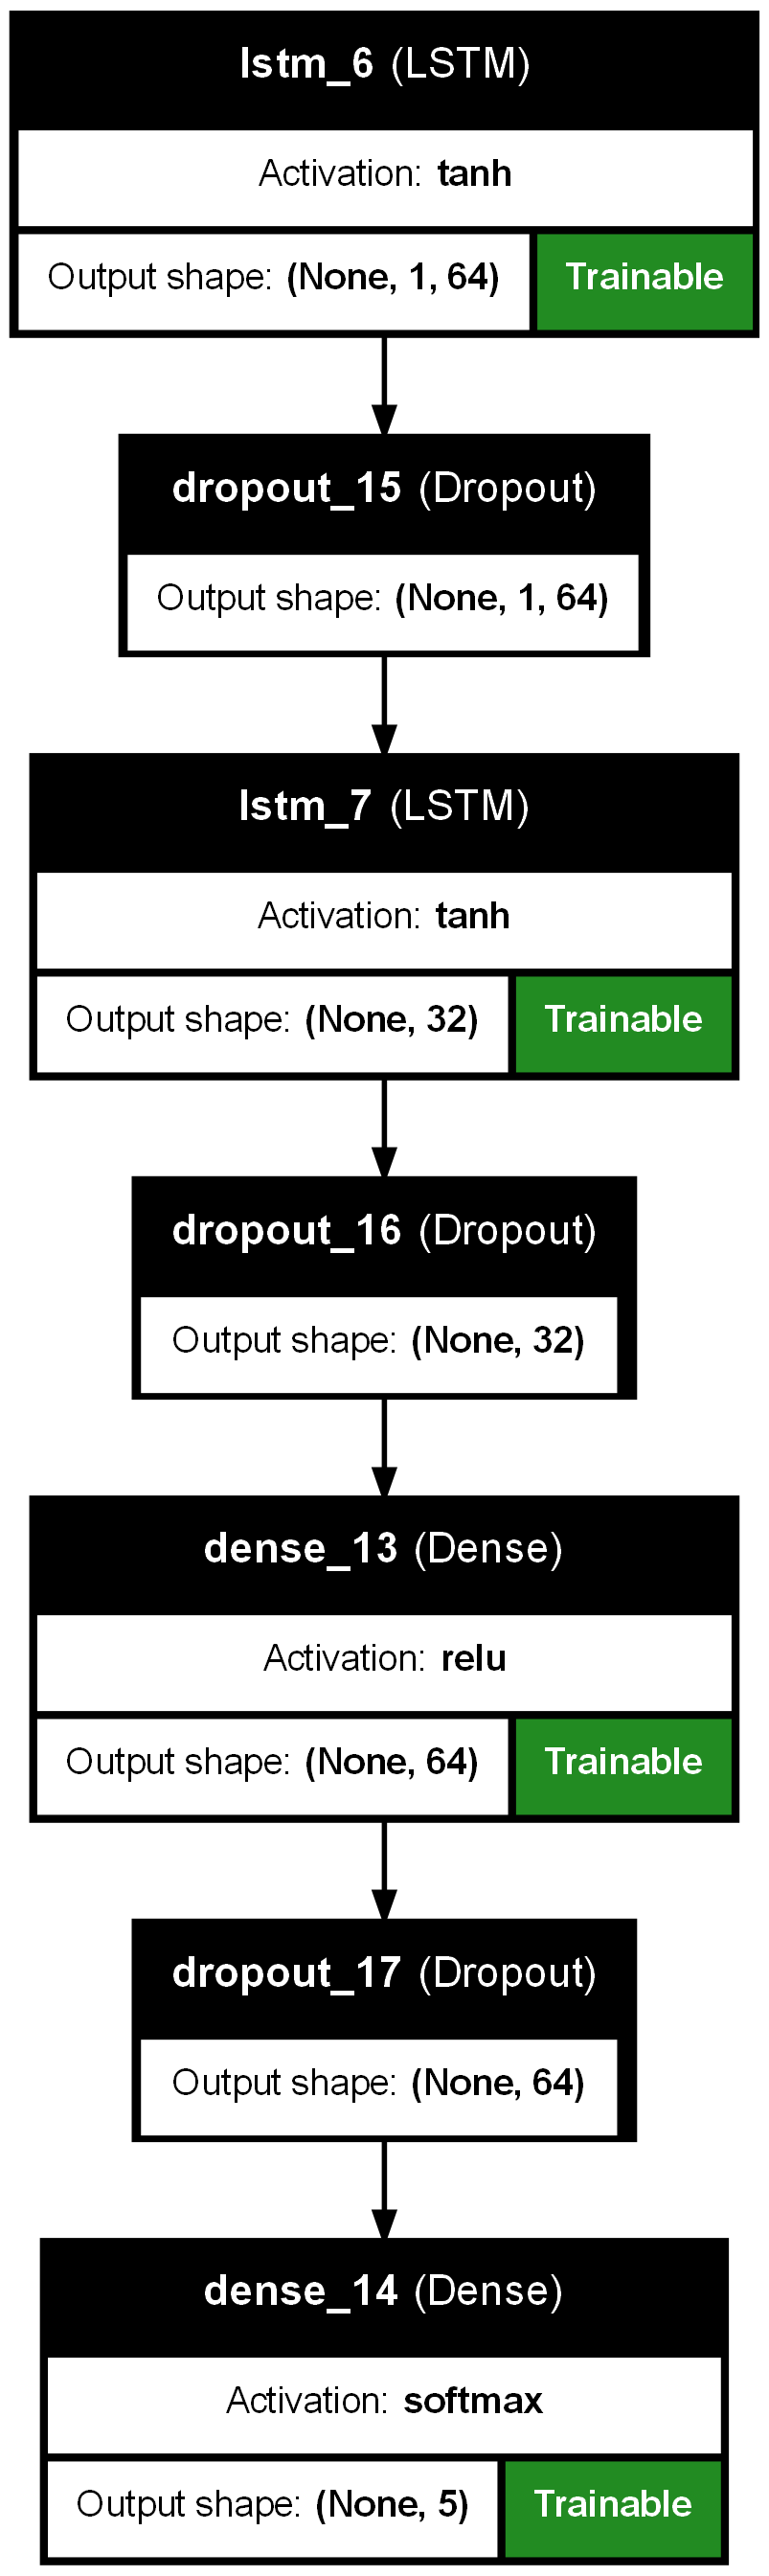

In [253]:
# from tensorflow.keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
plot_model(model_lstm_normal, to_file='model_plot_lstm_normal.png',
 show_shapes=True,
 show_layer_names=True,
 layer_range=None,
 show_layer_activations=True,
 show_trainable=True)


In [254]:
model_lstm_normal.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1, 64)               │       3,767,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,782,661 (14.43 MB)

 Trainable params: 3,782,661 (14.43 MB)

 Non-trainable params: 0 (0.00 B)

In [255]:
# Compile the model
model_lstm_normal.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

#

In [256]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
# history_model_dl3 = model_dl3.fit(df, y_train_resampled, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])
history_model_lstm = model_lstm_normal.fit(dense_array_X_train_transformed_resampled_reshaped, y_train_resampled, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.2498 - loss: 1.5455 - val_accuracy: 0.2037 - val_loss: 2.0815
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.3456 - loss: 1.4266 - val_accuracy: 0.2088 - val_loss: 1.9354
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.4676 - loss: 1.2488 - val_accuracy: 0.2274 - val_loss: 1.8445
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5546 - loss: 1.0982 - val_accuracy: 0.2319 - val_loss: 1.7639
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.6234 - loss: 0.9351 - val_accuracy: 0.2844 - val_loss: 1.7828
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7003 - loss: 0.7959 - val_accuracy: 0.4023 - val_loss: 1.7832
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7515 - loss: 0.6904 - val_accuracy: 0.4478 - val_loss: 1.8802
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.7787 - loss: 0.6132 - val_acc

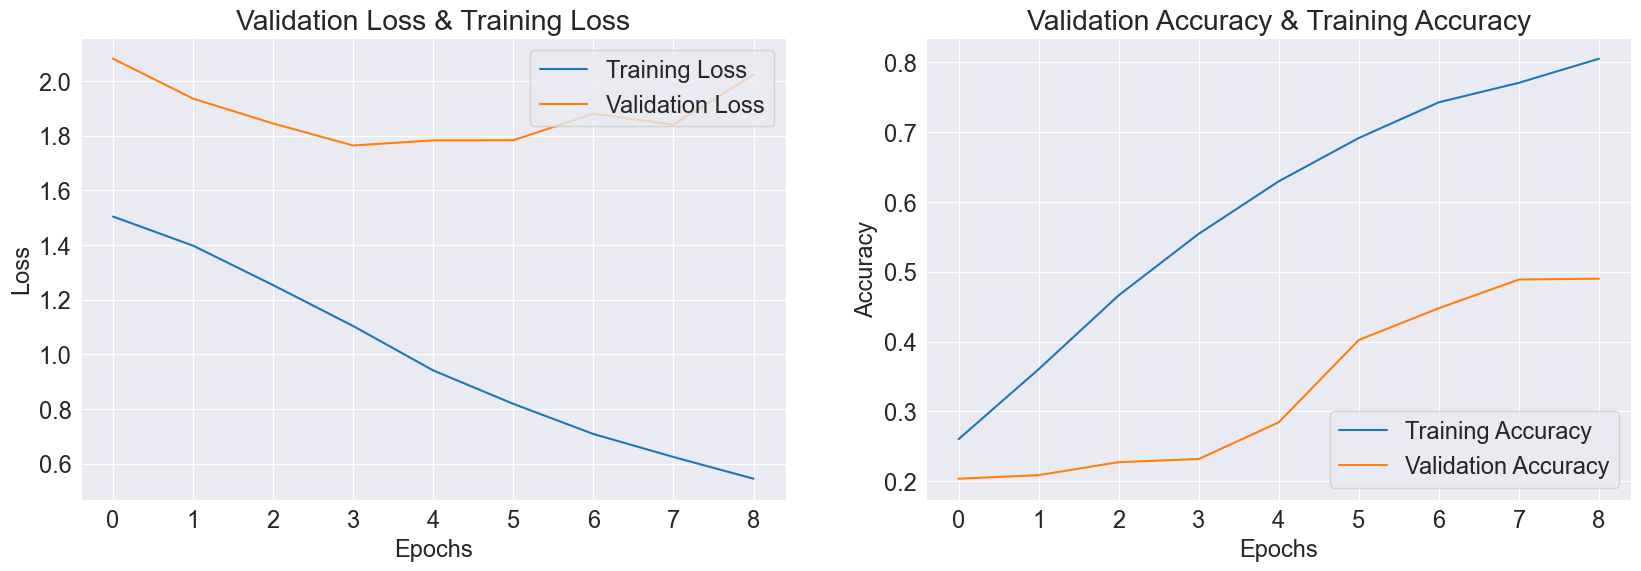

In [257]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Plot the first subplot (loss)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(history_model_lstm.history["loss"])
plt.plot(history_model_lstm.history["val_loss"])
plt.title("Validation Loss & Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
leg = plt.legend(["Training Loss", "Validation Loss"], loc="upper right")

# Plot the second subplot (accuracy)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(history_model_lstm.history["accuracy"])
plt.plot(history_model_lstm.history["val_accuracy"])
plt.title("Validation Accuracy & Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
leg = plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

plt.show()


**So ths deep learning model is overfitted**

In [ ]:
# dense_array_val_X_val_transformed_reshaped = dense_array_val_X_val_transformed.reshape(dense_array_val_X_val_transformed.shape[0], 1, dense_array_val_X_val_transformed.shape[1])



In [258]:
y_pred_val_model_lstm_normal = model_lstm_normal.predict(dense_array_val_X_val_transformed_reshaped)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [259]:
predicted_class_model_lstm_normal = np.argmax(y_pred_val_model_lstm_normal, axis=1)
predicted_class_model_lstm_normal

array([1, 2, 2, ..., 3, 2, 1], dtype=int64)

**KAPPA SCORE**

In [260]:
from sklearn.metrics import cohen_kappa_score

kp_model_lstm=cohen_kappa_score(y_val,predicted_class_model_lstm_normal)
kp_model_lstm

0.20079267785056332

## After verifying these 4 deep learning models I found that model 2 (MLP) is working better among others

### On TEST DATA

In [281]:
df_test_copy.head(1)

Type  Age Gender Color1 Color2   Color3 MaturitySize FurLength Vaccinated  \
0  Cat  1.0   Male  Black  White  Unknown        Small       Yes         No   

  Dewormed Sterilized   Health  Fee  \
0       No         No  Healthy  0.0   

                                         Description  \
0  kitten for adoption, pls call for enquiry, off...   

                                              Images                Breed  
0  C:\Users\praba\Documents\GitHub\UCA SEMESTER 2...  Domestic_Short_Hair

In [282]:
df_test_copy["Images"][0]

'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\test_images_all\\5df99d229-2.jpg'

In [283]:
df_test_copy_transformed = my_sklearn_pipeline.transform(df_test_copy)

In [284]:
import pandas as pd
dense_array_test = df_test_copy_transformed.toarray()


df_test_copy_transformed_dataframe = pd.DataFrame(dense_array_test)


In [285]:
df_test_copy_transformed_dataframe.head()

0         1         2         3         4      5      6      7      \
0 -1.226519 -0.559747  1.140316 -1.620921 -0.310264    1.0    0.0    0.0   
1  0.815316 -0.203756  1.140316  0.207758 -0.310264    1.0    0.0    0.0   
2  0.815316 -0.508891 -0.876950  0.207758 -0.310264    0.0    1.0    0.0   
3  0.815316 -0.458035 -0.876950  0.207758 -0.310264    1.0    0.0    0.0   
4 -1.226519 -0.458035 -0.876950  0.207758 -0.184925    0.0    1.0    0.0   

   8      9      ...  14643  14644  14645  14646  14647  14648     14649  \
0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.261236   
1    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.337393   
2    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.503165   
3    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.314961   
4    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0  0.440789   

      14650     14651     14652  
0  0.070225  0.370787  0.297753  
1  0.076736  0.331303  0.254568  
2  0.060127  0.164557  0.272152  
3  0.031496  0.244094  0.409449  
4  0.019737  0.210526  0.328947  

[5 rows x 14653 columns]

#### save the transformed training data as csv so that I can use those during ml and dl training


#### df_test_copy_transformed as df_test_copy_transformed_dataframe dataframe is stored in df_test_copy_transformed_dataframe_df.csv

In [111]:
# df_test_copy_transformed_dataframe.to_csv('df_test_copy_transformed_dataframe_df.csv')


In [127]:
# df_test_copy_transformed_dataframe = pd.read_csv('df_test_copy_transformed_dataframe_df.csv')


## **As the highest kappa score I found by using model 2 (MLP) so finally I will use it  for the test data prediction**


In [290]:
# dense_array_test

In [292]:
y_pred_MLP_model2_true = model_dl3.predict(dense_array_test)



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [297]:
y_pred_MLP_model2_true.shape

(500, 5)

In [298]:
predicted_class_model_model2_test = np.argmax(y_pred_MLP_model2_true, axis=1)
predicted_class_model_model2_test

array([2, 2, 2, 2, 3, 1, 4, 2, 1, 1, 3, 2, 1, 4, 2, 3, 2, 3, 1, 4, 1, 3,
       1, 1, 2, 1, 4, 4, 4, 3, 2, 1, 4, 2, 3, 4, 3, 1, 1, 2, 4, 3, 4, 2,
       4, 1, 1, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 2, 4,
       2, 3, 4, 4, 3, 2, 2, 1, 3, 1, 2, 1, 4, 4, 4, 2, 4, 2, 1, 1, 4, 4,
       2, 3, 1, 4, 1, 4, 2, 2, 2, 2, 4, 2, 3, 4, 4, 4, 3, 2, 2, 2, 3, 3,
       1, 4, 2, 2, 1, 2, 4, 1, 4, 4, 3, 4, 2, 2, 4, 1, 2, 1, 2, 3, 4, 2,
       1, 2, 3, 4, 2, 3, 4, 1, 3, 2, 1, 2, 2, 1, 4, 3, 2, 3, 2, 3, 3, 3,
       1, 3, 2, 4, 2, 4, 1, 2, 4, 3, 2, 4, 1, 3, 4, 4, 4, 4, 4, 3, 4, 2,
       3, 1, 4, 4, 2, 2, 2, 2, 2, 2, 3, 1, 4, 4, 2, 4, 1, 4, 2, 1, 3, 3,
       2, 4, 4, 1, 4, 2, 3, 2, 2, 4, 4, 2, 3, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 1, 4, 2, 2, 4, 1, 4, 2, 3, 4, 2,
       1, 3, 2, 4, 1, 3, 3, 1, 2, 4, 2, 4, 4, 4, 4, 1, 2, 2, 1, 2, 4, 2,
       4, 1, 2, 4, 2, 2, 1, 3, 2, 4, 3, 2, 4, 2, 1, 2, 2, 2, 1, 4, 4, 2,
       2, 2, 3, 2, 4, 2, 3, 1, 4, 2, 2, 3, 4, 1, 4,

In [299]:
models_pred_dl = {}
models_pred_dl['prediction rate'] = predicted_class_model_model2_test


In [300]:
df_final_result_test_dl = pd.DataFrame(models_pred_dl)
print(df_final_result_test_dl)

     prediction rate
0                  2
1                  2
2                  2
3                  2
4                  3
..               ...
495                4
496                1
497                4
498                4
499                3

[500 rows x 1 columns]


In [302]:
df_final_result_test_dl.to_csv(' result_dl.csv',index_label = 'id')

______________________________________________________ END _____________________________________________________

## I was planning to use Vgg16 for image extraction but didnot use that as its a pretrained model


### I only processed the training dataset
### i haven't porcessed the test dataset

In [351]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16
from keras.models import Model

In [352]:
base_model = VGG16(weights='imagenet', include_top=False)


In [353]:

model = Model(inputs=base_model.input, outputs=base_model.output)

In [354]:
import numpy as np

# Function to extract features from a batch of images
def extract_features_batch(img_paths):
    batch_features = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match VGG16 input size
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)  # Preprocess input based on VGG16 requirements
        features = model.predict(x)
        batch_features.append(features.flatten())  # Flatten the features into a 1D array
    return np.array(batch_features)





In [355]:
# df_train_copy['Images'].shape
df_train_copy['Images'][0]

'C:\\Users\\praba\\Documents\\GitHub\\UCA SEMESTER 2 M1\\deeplearning 2\\final project and lab\\drive-download-20240301T144626Z-001\\train_images_all\\3b178aa59-5.jpg'

In [356]:
df_train_copy['Images'].shape[0]


9000

**batch size is 32 used as its not possible to process all 9000 images in a singal batch**

In [357]:
# Process images in batches of size 64
batch_size = 32
num_images = df_train_copy['Images'].shape[0]

num_batches = (num_images + batch_size - 1) // batch_size

image_features = []

# Measure the time taken to execute the loop
%time
for batch_index in range(num_batches):
    start_index = batch_index * batch_size
    end_index = min((batch_index + 1) * batch_size, num_images)
    batch_img_paths = df_train_copy['Images'][start_index:end_index]
    batch_features = extract_features_batch(batch_img_paths)
    image_features.extend(batch_features)

# print("Shape of extracted features:", len(image_features))

CPU times: total: 0 ns
Wall time: 0 ns
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [360]:
image_features_array = np.array(image_features)

In [361]:
import pandas as pd

df_vgg = pd.DataFrame(image_features_array)

print("Shape of DataFrame:", df_vgg.shape)


Shape of DataFrame: (9000, 25088)


In [385]:
# Creating pipelines for numerical and categorical features
numerical_pipeline_dl = Pipeline(steps=[
    ('stdscaler', StandardScaler())
])

categorical_pipeline_dl = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
])

# Define pipeline for text features
text_transformer_pipeline_dl = Pipeline(steps=[ ('vectorizer', CountVectorizer(max_features=1000))])



col_transformer_dl = ColumnTransformer(transformers=[
   ('drop_columns','drop',drop_features),

    ('numerical', numerical_pipeline_dl, numerical_features),
    ('categorical', categorical_pipeline_dl, categorical_features),
    
    ('text-data', text_transformer_pipeline_dl, 'Description')
#     
    
])


    
my_sklearn_pipeline_dl = Pipeline(steps=[
    ('TypeConverter', TypeConverter()),
    ('age', AgeConverter()),
    ('text_cleaner', TextCleaner()),
    ('MaturitySizeConverter' ,MaturitySizeConverter()),
    ("GenderConverter",GenderConverter()),

                 ('col_transformer',col_transformer_dl)
    ]

                           )


In [386]:
my_sklearn_pipeline_dl

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'Age', 'Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(max_features=1000))]),
                                                  'Description')]))])

In [388]:
X.shape

(9000, 16)

In [389]:
#  fits the sklearn pipeline `my_sklearn_pipeline` to the training data X_train.

my_sklearn_pipeline_dl.fit(X)

Pipeline(steps=[('TypeConverter', TypeConverter()), ('age', AgeConverter()),
                ('text_cleaner', TextCleaner()),
                ('MaturitySizeConverter', MaturitySizeConverter()),
                ('GenderConverter', GenderConverter()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Color3']),
                                                 ('numerical',
                                                  Pipeline(steps=[('stdscaler',
                                                                   StandardScaler())]),
                                                  ['Type', 'Age', 'Gender',
                                                   'MaturitySize', 'Fee']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Color1', 'Color2',
                                                   'FurLength', 'Vaccinated',
                                                   'Dewormed', 'Sterilized',
                                                   'Health', 'Breed']),
                                                 ('text-data',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(max_features=1000))]),
                                                  'Description')]))])

In [390]:
X_train_transform_dl = my_sklearn_pipeline_dl.transform(X)

In [391]:
X_train_transform_dl

<9000x1187 sparse matrix of type '<class 'numpy.float64'>'
	with 321553 stored elements in Compressed Sparse Row format>

In [392]:
import pandas as pd


dense_arrayX_train_transform_dl = X_train_transform_dl.toarray()

df_dense_arrayX_train_transform_dl = pd.DataFrame(dense_arrayX_train_transform_dl)
df_dense_arrayX_train_transform_dl.head(2)

0         1         2         3         4     5     6     7     8     \
0  0.820282  3.720374  1.129934 -1.626893 -0.299511   0.0   1.0   0.0   0.0   
1  0.820282 -0.557090 -0.885007  0.208409  0.313454   1.0   0.0   0.0   0.0   

   9     ...  1177  1178  1179  1180  1181  1182  1183  1184  1185  1186  
0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  

[2 rows x 1187 columns]

In [393]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler



pipeline_final_pca = Pipeline(steps=[
#     ('pipe_my',my_sklearn_pipeline),
    
     ('scaler', MinMaxScaler()),  # Step 1: MinMaxScaler the features
    ('pca', PCA(n_components=5))   # Step 5: Apply PCA with 2 components
    
                          ],
                             memory = 'tmp/cache'
                            )




In [394]:
pipeline_final_pca

Pipeline(memory='tmp/cache',
         steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=5))])

In [395]:
# Now you can fit the pipeline to your data and transform it
# Assuming X is your data matrix
pca_result = pipeline_final_pca.fit_transform(df_vgg)

In [396]:
pca_result.shape

(9000, 5)

In [397]:
import pandas as pd

df_vgg_pca = pd.DataFrame(pca_result)

print("Shape of DataFrame:", df_vgg_pca.shape)


Shape of DataFrame: (9000, 5)


In [405]:
result_final_data = pd.concat([df_dense_arrayX_train_transform_dl, df_vgg_pca,y], axis=1)


In [406]:
result_final_data.shape

(9000, 1193)

In [483]:
result_final_data.head(2)

0         1         2         3         4    5    6    7    8    9  \
0  0.820282  3.720374  1.129934 -1.626893 -0.299511  0.0  1.0  0.0  0.0  0.0   
1  0.820282 -0.557090 -0.885007  0.208409  0.313454  1.0  0.0  0.0  0.0  0.0   

   ...  1183  1184  1185  1186         0         1         2         3  \
0  ...   0.0   0.0   0.0   0.0  1.013023 -0.589681  0.710931  0.651019   
1  ...   0.0   0.0   1.0   0.0  1.744552  0.926937 -1.067492  0.113089   

          4  AdoptionSpeed  
0 -1.138258            4.0  
1 -0.893152            3.0  

[2 rows x 1193 columns]

In [486]:
import pandas as pd

result_final_data.columns = range(len(result_final_data.columns))

print(result_final_data)


          0         1         2         3         4     5     6     7     \
0     0.820282  3.720374  1.129934 -1.626893 -0.299511   0.0   1.0   0.0   
1     0.820282 -0.557090 -0.885007  0.208409  0.313454   1.0   0.0   0.0   
2     0.820282 -0.557090  1.129934  0.208409 -0.299511   0.0   1.0   0.0   
3     0.820282 -0.454018  1.129934  0.208409 -0.299511   1.0   0.0   0.0   
4     0.820282 -0.196340  1.129934  2.043710 -0.299511   0.0   1.0   0.0   
...        ...       ...       ...       ...       ...   ...   ...   ...   
8995  0.820282  1.298196 -0.885007  0.208409 -0.299511   0.0   0.0   1.0   
8996 -1.219093 -0.299411  1.129934  0.208409 -0.299511   0.0   0.0   0.0   
8997 -1.219093 -0.350947  1.129934 -1.626893 -0.299511   1.0   0.0   0.0   
8998  0.820282  0.009803  1.129934  0.208409 -0.299511   0.0   1.0   0.0   
8999  0.820282 -0.505554 -0.885007  0.208409 -0.299511   1.0   0.0   0.0   

      8     9     ...  1183  1184  1185  1186      1187      1188      1189  \
0      0

In [512]:
result_final_data.head()

0         1         2         3         4     5     6     7     8     \
0  0.820282  3.720374  1.129934 -1.626893 -0.299511   0.0   1.0   0.0   0.0   
1  0.820282 -0.557090 -0.885007  0.208409  0.313454   1.0   0.0   0.0   0.0   
2  0.820282 -0.557090  1.129934  0.208409 -0.299511   0.0   1.0   0.0   0.0   
3  0.820282 -0.454018  1.129934  0.208409 -0.299511   1.0   0.0   0.0   0.0   
4  0.820282 -0.196340  1.129934  2.043710 -0.299511   0.0   1.0   0.0   0.0   

   9     ...  1183  1184  1185  1186      1187      1188      1189      1190  \
0   0.0  ...   0.0   0.0   0.0   0.0  1.013023 -0.589681  0.710931  0.651019   
1   0.0  ...   0.0   0.0   1.0   0.0  1.744552  0.926937 -1.067492  0.113089   
2   0.0  ...   0.0   0.0   0.0   0.0  2.968973 -0.419956  0.513002 -1.587275   
3   0.0  ...   0.0   0.0   0.0   0.0  0.303877 -0.815112  0.252377  1.002717   
4   0.0  ...   0.0   0.0   0.0   0.0  0.616000 -0.269426  0.987940  1.800154   

       1191  1192  
0 -1.138258   4.0  
1 -0.893152   3.0  
2 -0.142300   1.0  
3 -0.438310   4.0  
4 -0.814048   3.0  

[5 rows x 1193 columns]

In [513]:
result_final_data_X = result_final_data.drop(1192, axis=1).copy()
result_final_data_y = result_final_data[1192]

In [526]:
from sklearn.model_selection import train_test_split
result_final_dataX_train, result_final_dataX_val, result_final_datay_train, result_final_datay_val = train_test_split(result_final_data_X, result_final_data_y, test_size=0.10, random_state=2022,stratify=result_final_data_y)

In [527]:
# import numpy as np

# result_final_data_X_array = result_final_data_X.values

In [528]:
# result_final_data_y_array = result_final_data_y.values

In [532]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model_dl_mlp_4 = Sequential([
    Input(shape=(result_final_dataX_train.shape[1],)),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    BatchNormalization(),
    Dense(5, activation='softmax')
])




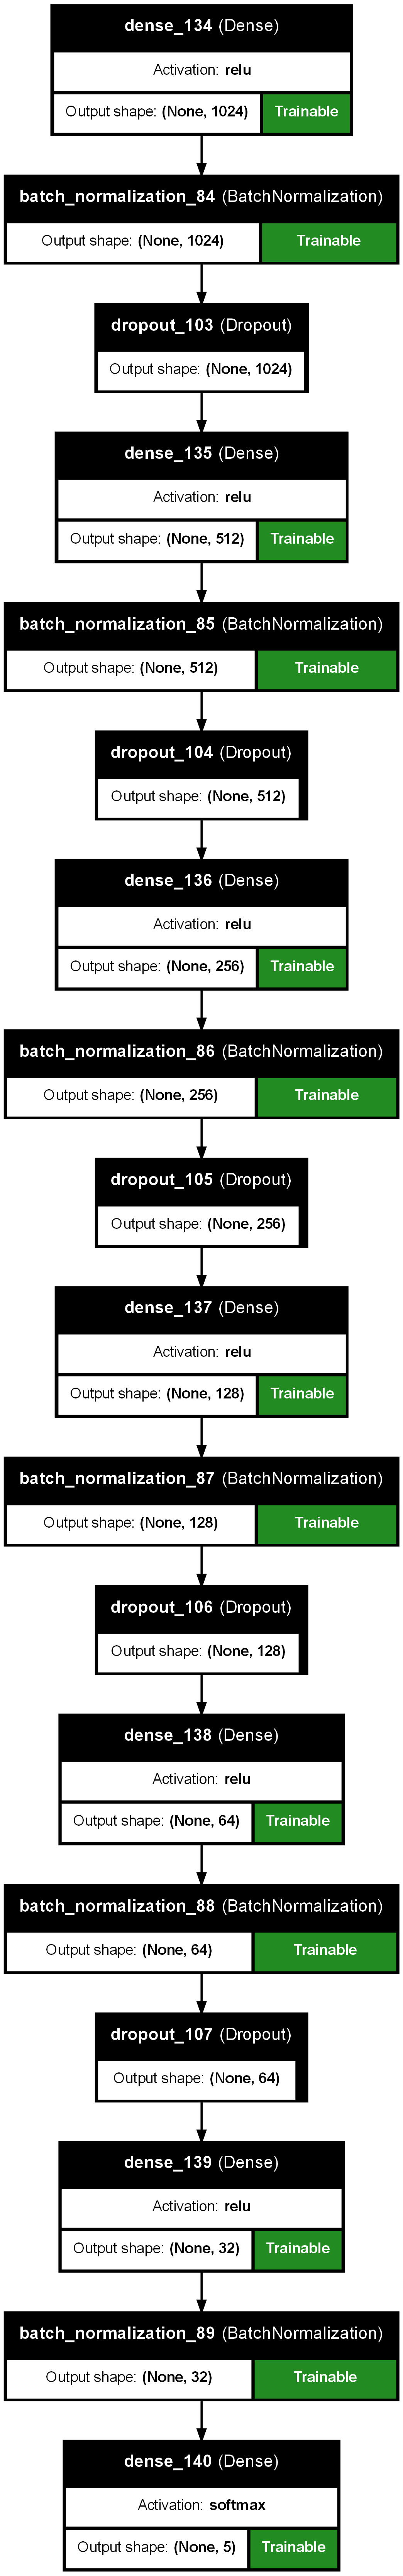

In [536]:
# from tensorflow.keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
# plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_laye
plot_model(model_dl_mlp_4, to_file='model_dl_mlp_4.png',
 show_shapes=True,
 show_layer_names=True,
 layer_range=None,
 show_layer_activations=True,
 show_trainable=True)


In [537]:
model_dl_mlp_4.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_134 (Dense)                    │ (None, 1024)                │       1,221,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_103 (Dropout)                │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_138 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_89               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 5,779,601 (22.05 MB)

 Trainable params: 1,925,189 (7.34 MB)

 Non-trainable params: 4,032 (15.75 KB)

 Optimizer params: 3,850,380 (14.69 MB)

In [533]:
model_dl_mlp_4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [534]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_model_mlp4 = model_dl_mlp_4.fit(result_final_dataX_train, result_final_datay_train, epochs=50, validation_split=0.2, batch_size=64, callbacks=[early_stopping])


Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.2474 - loss: 8.4722 - val_accuracy: 0.2790 - val_loss: 7.5343
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3105 - loss: 7.4171 - val_accuracy: 0.3142 - val_loss: 6.7200
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3254 - loss: 6.5251 - val_accuracy: 0.3605 - val_loss: 5.8606
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3977 - loss: 5.6452 - val_accuracy: 0.3481 - val_loss: 5.1123
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4130 - loss: 4.8705 - val_accuracy: 0.3716 - val_loss: 4.4691
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4628 - loss: 4.2167 - val_accuracy: 0.3728 - val_loss: 3.9810
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5015 - loss: 3.6573 - val_accuracy: 0.3889 - val_loss: 3.5807
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5444 - loss: 3.2121 - val_acc

In [535]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Plot the first subplot (loss)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(history_model_mlp4.history["loss"])
plt.plot(history_model_mlp4.history["val_loss"])
plt.title("Validation Loss & Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
leg = plt.legend(["Training Loss", "Validation Loss"], loc="upper right")

# Plot the second subplot (accuracy)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(history_model_mlp4.history["accuracy"])
plt.plot(history_model_mlp4.history["val_accuracy"])
plt.title("Validation Accuracy & Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
leg = plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

plt.show()


In [539]:
y_pred_val_model_mlp4 = model_dl_mlp_4.predict(result_final_dataX_val)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [542]:
predicted_class_model_mlp4 = np.argmax(y_pred_val_model_mlp4, axis=1)
predicted_class_model_mlp4.shape

(900,)

In [541]:
from sklearn.metrics import cohen_kappa_score

kp_model_mlp4=cohen_kappa_score(result_final_datay_val,predicted_class_model_mlp4)
kp_model_mlp4

0.1875805825369964